# We have tried ResNet50 with mutiple approaches in this. Those are shown after our trial with GMM approach

In [ ]:
# Trying GMM

In [801]:
from sklearn.mixture import GaussianMixture

In [802]:
d=torch.load(f'dataset/part_one_dataset/train_data/{1}_train_data.tar.pth')
targets=d['targets']
extracted_feature3=pd.read_parquet(f'task_1_models/new_extractor_ui/store_features/train_dataset_{1}.parquet')


In [820]:
with open(f'task_1_models/imp/new_extractor/pca/umap_{1}.pkl','rb') as f:
    umap_model=pickle.load(f)

In [821]:
extracted_feature3=umap_model.transform(extracted_feature3)

In [823]:
train_data=pd.DataFrame(extracted_feature3).copy()
train_data['targets']=targets

In [824]:
class_means=np.array(train_data.groupby('targets').mean())
cov_mat=[]
for x in [0,1,2,3,4,5,6,7,8,9]:
    temp=train_data[train_data['targets']==x].copy()
    del temp['targets']
    cov_mat.append(np.cov(temp))

In [825]:
gmm=GaussianMixture(n_components=10, covariance_type='full', random_state=42)
gmm.means_init=class_means
gmm.covariances_init=cov_mat
gmm.fit(extracted_feature3)

GaussianMixture(means_init=array([[ 5.5823975,  1.62931  ,  8.390421 , ...,  5.819445 ,  4.4587903,
         5.033882 ],
       [ 7.175225 ,  4.687836 ,  2.364693 , ...,  6.1169705,  4.2492933,
         5.242519 ],
       [ 1.4404296,  1.79581  ,  4.4699807, ...,  6.0982366,  4.4074025,
         4.744426 ],
       ...,
       [-1.2442   ,  7.2534294,  6.245224 , ...,  5.6699815,  4.092898 ,
         4.745894 ],
       [ 7.6219845,  1.6335262,  9.815275 , ...,  5.549721 ,  4.584483 ,
         4.6618147],
       [ 8.191789 ,  4.14993  ,  3.901878 , ...,  5.989247 ,  4.287843 ,
         5.105343 ]], dtype=float32),
                n_components=10, random_state=42)

In [826]:
predicted_labels=gmm.predict(extracted_feature3)

In [827]:
(predicted_labels==targets).sum()/2500

0.1264

In [829]:
targets

array([6, 9, 9, ..., 9, 9, 7])

In [828]:
predicted_labels

array([0, 9, 0, ..., 0, 0, 0])

In [ ]:
# second best results with InceptionV3 code is below

In [ ]:
# base_model=InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
# global_avg_pool = GlobalAveragePooling2D()(base_model.output)

# feature_extractor = Model(inputs=base_model.input, outputs=global_avg_pool)
# def preprocess_images(x_data):
#     # Resize images to (299, 299)
#     x_data_resized = np.array([cv2.resize(img, (299, 299)) for img in x_data])
#     x_data_resized = x_data_resized.astype('float32') / 255.0  # Normalize pixel values
#     return x_data_resized
    
# # saving extracted features as it takes time to load- Task 1
# for dataset in [1,2,3,4,5,6,7,8,9,10]:
#     print(dataset)
#     d=torch.load(f'dataset/part_one_dataset/train_data/{dataset}_train_data.tar.pth')
#     data=d['data'] 
#     d1_fea=feature_extractor.predict(preprocess_images(data))
#     pd.DataFrame(d1_fea).to_parquet(f'task_1_models/new_extractor_ui/store_features/train_dataset_{dataset}.parquet')
    
# for dataset in [1,2,3,4,5,6,7,8,9,10]:
#     print(dataset)
#     d=torch.load(f'dataset/part_one_dataset/eval_data/{dataset}_eval_data.tar.pth')
#     data=d['data'] 
#     d1_fea=feature_extractor.predict(preprocess_images(data))
#     pd.DataFrame(d1_fea).to_parquet(f'task_1_models/new_extractor_ui/store_features/eval_dataset_{dataset}.parquet')

# saving extracted features as it takes time to load - Task 2
for dataset in [1,2,3,4,5,6,7,8,9,10]:
    print(dataset)
    d=torch.load(f'dataset/part_two_dataset/train_data/{dataset}_train_data.tar.pth')
    data=d['data'] 
    d1_fea=feature_extractor.predict(preprocess_images(data))
    pd.DataFrame(d1_fea).to_parquet(f'task_1_models/new_extractor_ui/store_features/part_2/train_dataset_{dataset}.parquet')
    
for dataset in [1,2,3,4,5,6,7,8,9,10]:
    print(dataset)
    d=torch.load(f'dataset/part_two_dataset/eval_data/{dataset}_eval_data.tar.pth')
    data=d['data'] 
    d1_fea=feature_extractor.predict(preprocess_images(data))
    pd.DataFrame(d1_fea).to_parquet(f'task_1_models/new_extractor_ui/store_features/part_2/eval_dataset_{dataset}.parquet')
    

# saving the feature extractor in case its needed
import pickle
with open(f'task_1_models/new_extractor_ui/feature_extractor.pkl','wb') as f:
    pickle.dump(feature_extractor,f)

In [ ]:
# PLEASE DO NOT RUN THIS CELL,AS IT WILL TAKE LONG TIME AND IT WILL RETRAIN THE UMAP AND OTHER MODELS
# training models and storing them sequentially as told in the project instructions.
done_dataset_number=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print(data_set_num)
    extracted_feature3=pd.read_parquet(f'task_1_models/new_extractor_ui/store_features/train_dataset_{data_set_num}.parquet')
    if data_set_num==1:
        d=torch.load(f'dataset/part_one_dataset/train_data/{data_set_num}_train_data.tar.pth')
        targets=d['targets']
    else:
        targets=old_targets

    
    #training umap for feature extraction process further: This was finallized after multiple hyperparameter tuning iterations
    if data_set_num==1:
        from sklearn.preprocessing import Normalizer
        normalizer=Normalizer(norm='l2')
        extracted_feature3=normalizer.fit_transform(extracted_feature3)
        with open(f'task_1_models/imp/new_extractor/pca/normalizer_{data_set_num}.pkl','wb') as f:
            pickle.dump(normalizer,f)        
        umap_model=UMAP(n_components=512,n_neighbors=20,metric='manhattan',spread=100)
        extracted_feature3 = umap_model.fit_transform(extracted_feature3)
        import pickle
        with open(f'task_1_models/imp/new_extractor/pca/umap_{data_set_num}.pkl','wb') as f:
            pickle.dump(umap_model,f)
    else:
        with open(f'task_1_models/imp/new_extractor/pca/umap_{1}.pkl','rb') as f:
            umap_model=pickle.load(f)  
        with open(f'task_1_models/imp/new_extractor/pca/normalizer_{1}.pkl','rb') as f:
            normalizer=pickle.load(f)  
            extracted_feature3=normalizer.transform(extracted_feature3)
            extracted_feature3 = umap_model.transform(extracted_feature3)

    train_data=pd.DataFrame(extracted_feature3).copy()
    train_data['label']=targets

    
    class_prototypes=train_data.groupby('label').mean() # this is the model
    print(class_prototypes.index)
    
    # in case some label is missing in new data, we keep the missing label's mean vector same as original (as no data to update it with)
    if len(class_prototypes.index)!=10:
        missing_pro=prev_prototypes[~prev_prototypes.index.isin(class_prototypes.index)]
        missing_pro_updated=pd.concat([class_prototypes,missing_pro])
        class_prototypes=missing_pro_updated.sort_index()

    lambda_l2=0.01 # regularization to avoid overfitting issues
    class_prototypes=class_prototypes.apply(lambda x: x - lambda_l2 * x)   

    if data_set_num!=1:
        # prototype update from old
        class_prototypes.columns=class_prototypes.columns.astype(int)
        prev_prototypes.columns=prev_prototypes.columns.astype(int)
        class_prototypes=(0.1*class_prototypes)+(0.9*prev_prototypes) # keeping old weight more as we know first model did good


    print(class_prototypes.index)
    class_prototypes.to_csv(f'task_1_models/imp/new_extractor_ui/class_prototypes_{data_set_num}.csv')
    final_cov_matrix=pd.DataFrame()

    for classs in [0,1,2,3,4,5,6,7,8,9]:
        # compute new covariance matrix for each iteration: additing shrinkage
        extracted_feature3_copy=pd.DataFrame(extracted_feature3).copy()
        extracted_feature3_copy['label']=targets
        extracted_feature3_copy=extracted_feature3_copy[extracted_feature3_copy['label']==classs]
        # if len(extracted_feature3_copy)==0: #ensure dataset 1 has all classes, else old_cov_inv should throw an error
        #     inverse_cov_matrix=old_cov_inv[old_cov_inv['class']==classs]
        #     final_cov_matrix=pd.concat([inverse_cov_matrix,final_cov_matrix]).reset_index(drop=True)
        #     continue
            
        del extracted_feature3_copy['label']
        cov_model=LedoitWolf()
        epsilon=1e-5
        cov_matrix=cov_model.fit(np.array(extracted_feature3_copy)).covariance_ 
        cov_matrix=cov_matrix+(np.eye(cov_matrix.shape[0]) * epsilon)
        #cov_matrix=np.cov(extracted_feature3,rowvar=False)
        
        inverse_cov_matrix=np.linalg.inv(cov_matrix)
        inverse_cov_matrix=pd.DataFrame(inverse_cov_matrix)
        inverse_cov_matrix['class']=classs
        final_cov_matrix=pd.concat([inverse_cov_matrix,final_cov_matrix]).reset_index(drop=True)

    if data_set_num!=1:
        final_cov_matrix=(0.1*final_cov_matrix)+(0.9*old_cov_inv)
    pd.DataFrame(final_cov_matrix).to_csv(f'task_1_models/imp/new_extractor_ui/covariance_matrix_{data_set_num}.csv',index=False)

    # compute new covariance matrix for each iteration?
    # epsilon=1e-5
    # cov_matrix=np.cov(extracted_feature3,rowvar=False)
    # cov_matrix=cov_matrix+(np.eye(cov_matrix.shape[0]) * epsilon)
    # inverse_cov_matrix=np.linalg.inv(cov_matrix)
    # pd.DataFrame(inverse_cov_matrix).to_csv(f'task_1_models/new_extractor/pca/covariance_matrix_{data_set_num}.csv',index=False)
        
    if data_set_num==1:
        inverse_cov_matrix_1=inverse_cov_matrix.copy()
        
# training accuracy check
    min_distances = []
    # i=0
    for vector in np.array(extracted_feature3):
        # i=i+1
        # print(i,end='\r')
        a=[]
        for i,class_prototype in class_prototypes.iterrows():
            temp_cov=final_cov_matrix[final_cov_matrix['class']==i]
            del temp_cov['class']
            a.append(mahalanobis(vector, class_prototype, np.array(temp_cov)))
            #a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
        min_distance = np.argmin(a)
        min_distances.append(min_distance)
    print(f'training accuracy of dataset {data_set_num}',(pd.Series(min_distances)==pd.Series(targets)).sum()/len(targets))
    
    
    # make prediction for next dataset and use its prediction to generate new targets for next iteration 
    if data_set_num!=10:
        #d=torch.load(f'dataset/part_one_dataset/train_data/{data_set_num+1}_train_data.tar.pth')
        extracted_feature3=pd.read_parquet(f'task_1_models/new_extractor_ui/store_features/train_dataset_{data_set_num+1}.parquet')
        # find extracted_feature3 for this data
        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        # processed_images=preprocess_input(data)
        # extracted_features=fea_extracter.predict(processed_images)
        # extracted_feature3=GlobalMaxPooling2D()(extracted_features)
        extracted_feature3=normalizer.transform(extracted_feature3)
        extracted_feature3=umap_model.transform(extracted_feature3)
        
        # use previous matrix only
        # cov_matrix=np.cov(extracted_feature3,rowvar=False)
        # inverse_cov_matrix=np.linalg.inv(cov_matrix)
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                temp_cov=final_cov_matrix[final_cov_matrix['class']==i].copy()
                del temp_cov['class']
                a.append(mahalanobis(vector, class_prototype, np.array(temp_cov)))
                #a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        old_targets=min_distances # send this prediction as labels for next iteration   
        prev_prototypes=class_prototypes.copy() # keeping copy of this iteration prototypes, to be used for updating next iteration if needed to replace any missing class label vector
        old_cov_inv=pd.DataFrame(final_cov_matrix).copy()

In [ ]:
# finding accuracies matrix on heldout datasets
fig, ax=plt.subplots(55,2,figsize=(15,5*50))
fig_num=0
accuracy_matrix_final=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print('\nmodel ',data_set_num)
    class_prototypes=pd.read_csv(f'task_1_models/imp/new_extractor_ui/class_prototypes_{data_set_num}.csv').set_index('label')
    #inverse_cov_matrix=np.array(pd.read_csv(f'task_1_models/new_extractor/pca/covariance_matrix_{data_set_num}.csv'))
    final_cov_matrix=pd.read_csv(f'task_1_models/imp/new_extractor_ui/covariance_matrix_{data_set_num}.csv')
    accuracy_matrix={1:None,2:None,3:None,4:None,5:None,6:None,7:None,8:None,9:None,10:None}
    with open(f'task_1_models/imp/new_extractor/pca/umap_{1}.pkl','rb') as f:
        umap_model=pickle.load(f)
    with open(f'task_1_models/imp/new_extractor/pca/normalizer_{1}.pkl','rb') as f:
        normalizer=pickle.load(f)  
    # for all datasets lower than or equal to data_set_num
    for x in range(1,data_set_num+1,1):
        print('dataset',x)
        # read the dataset and extract its features and test accuracy
        d2=torch.load(f'dataset/part_one_dataset/eval_data/{x}_eval_data.tar.pth')
        extracted_feature3=pd.read_parquet(f'task_1_models/new_extractor_ui/store_features/eval_dataset_{x}.parquet')
        actual_targets=d2['targets']

        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        # processed_images=preprocess_input(data)
        # extracted_features=fea_extracter.predict(processed_images)
        # extracted_feature3=GlobalMaxPooling2D()(extracted_features)
        extracted_feature3=normalizer.transform(extracted_feature3)
        extracted_feature3=umap_model.transform(extracted_feature3)

        
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                temp_cov=final_cov_matrix[final_cov_matrix['class']==i].copy()
                del temp_cov['class']                
                a.append(mahalanobis(vector, class_prototype, np.array(temp_cov)))
                #a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        acc=(min_distances==actual_targets).sum()/len(actual_targets) 
        print('accuracy',acc)
        accuracy_matrix[x]=acc

        sns.scatterplot(ax=ax[fig_num][0],x=extracted_feature3[:,0],y=extracted_feature3[:,1],hue=actual_targets,palette=sns.color_palette("tab10", 10),legend=False).set_title(f'Model {data_set_num} Dataset {x} Actual')
        sns.scatterplot(ax=ax[fig_num][1],x=extracted_feature3[:,0],y=extracted_feature3[:,1],hue=min_distances,palette=sns.color_palette("tab10", 10),legend=False).set_title(f'Model {data_set_num} Dataset {x} Predicted')
        fig_num=fig_num+1
    accuracy_matrix_final.append(accuracy_matrix)
fig.savefig('task_1_models/imp/new_extractor_ui/result_plots_umap.png')
accuracy_matrix_final2=pd.DataFrame(accuracy_matrix_final).fillna('')
accuracy_matrix_final2.index=['model 1','model 2','model 3','model 4','model 5','model 6','model 7','model 8','model 9','model 10']
accuracy_matrix_final2.columns='dataset '+ pd.Series(accuracy_matrix_final2.columns).astype(str)
accuracy_matrix_final2 # not significant drop in previous datasets by ith model, but overall accuracy is not good

In [ ]:
# trying resnet now

In [216]:
import pandas as pd
import numpy as np
import torch
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
from scipy.spatial.distance import mahalanobis

In [41]:
d=torch.load('dataset/part_one_dataset/train_data/1_train_data.tar.pth')
data=d['data']
targets=d['targets']

In [44]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
resnet_model=ResNet50(weights='imagenet',input_shape=(32,32,3),include_top=False) # extracting features from last convolutional layer, hence no top classifification layer needed of pretrained resnet
resnet_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [145]:
task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.output)
processed_images=preprocess_input(data)
extracted_features=task1_model.predict(processed_images)
extracted_features2=extracted_features.reshape(2500,2048)
extracted_features2=pd.DataFrame(extracted_features2)

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step


In [105]:
# poor training result with euclidean distance and no kernel
# getting class mean
class_prototypes=train_data.groupby('label').mean()
predicted_labels=[]
for i,x in extracted_features2.iterrows():
    print(i,end='\r')
    all_dist=np.sqrt(np.square(x-class_prototypes).T.sum()).to_list()
    temp_label=np.argmin(np.sqrt(np.square(x-class_prototypes).T.sum()))
    predicted_labels.append([temp_label,all_dist])
    #break
(pd.DataFrame(predicted_labels)[0]==targets).sum()/len(predicted_labels)# accuracy on train

0.542

In [106]:
from sklearn.metrics.pairwise import rbf_kernel

In [189]:
# getting class mean and trying rbf kernel
class_prototypes=train_data.groupby('label').mean()
all_dist=rbf_kernel(extracted_features2,class_prototypes,gamma=0.0001)
predicted_labels=[]
for x in all_dist:
    predicted_labels.append(np.argmax(x))
(predicted_labels==targets).sum()/len(predicted_labels)

0.542

In [ ]:
task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
processed_images=preprocess_input(data)
extracted_features=task1_model.predict(processed_images)
extracted_feature3=GlobalMaxPooling2D()(extracted_features)

In [190]:
# use different layer as output for resnet

task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
processed_images=preprocess_input(data)
extracted_features=task1_model.predict(processed_images)


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


In [151]:
from tensorflow.keras.layers import GlobalAveragePooling2D,GlobalMaxPooling2D

In [191]:
extracted_feature2=GlobalAveragePooling2D()(extracted_features) # gave bad results
extracted_feature3=GlobalMaxPooling2D()(extracted_features) # gave better reuslts on training

In [206]:
train_data=pd.DataFrame(extracted_feature3).copy()
train_data['label']=targets
class_prototypes=train_data.groupby('label').mean()
del train_data['label']
predicted_labels=[]
# for i,x in pd.DataFrame(extracted_feature3).iterrows():
#     print(i,end='\r')
#     all_dist=np.sqrt(np.square(x-class_prototypes).T.sum()).to_list()
#     temp_label=np.argmin(np.sqrt(np.square(x-class_prototypes).T.sum()))
#     predicted_labels.append([temp_label,all_dist])
#     #break
all_dist=rbf_kernel(train_data,class_prototypes,gamma=0.00001)
for x in all_dist:
    predicted_labels.append(np.argmax(x))
(predicted_labels==targets).sum()/len(predicted_labels)

0.6396

In [197]:
train_data=pd.DataFrame(extracted_feature3).copy()
train_data['label']=targets
class_prototypes=train_data.groupby('label').mean()
predicted_labels=[]
for i,x in pd.DataFrame(extracted_feature3).iterrows():
    print(i,end='\r')
    all_dist=np.sqrt(np.square(x-class_prototypes).T.sum()).to_list()
    temp_label=np.argmin(np.sqrt(np.square(x-class_prototypes).T.sum()))
    predicted_labels.append([temp_label,all_dist])
    #break
(pd.DataFrame(predicted_labels)[0]==targets).sum()/len(predicted_labels)# accuracy on train

0.6396

In [219]:
# trying batch normalozation
batch=tf.keras.layers.BatchNormalization()
normalized_fea=batch(extracted_feature3,training=True)

train_data=pd.DataFrame(normalized_fea).copy()
train_data['label']=targets
class_prototypes=train_data.groupby('label').mean()
predicted_labels=[]
for i,x in pd.DataFrame(normalized_fea).iterrows():
    print(i,end='\r')
    all_dist=np.sqrt(np.square(x-class_prototypes).T.sum()).to_list()
    temp_label=np.argmin(np.sqrt(np.square(x-class_prototypes).T.sum()))
    predicted_labels.append([temp_label,all_dist])
    #break
(pd.DataFrame(predicted_labels)[0]==targets).sum()/len(predicted_labels)# accuracy on train

0.6464

In [174]:
task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv5_block3_out').output)
processed_images=preprocess_input(data)
extracted_features=task1_model.predict(processed_images)
extracted_feature4=GlobalAveragePooling2D()(extracted_features)
#extracted_features2=extracted_features.reshape(2500,2048)

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step


In [175]:
train_data=pd.DataFrame(extracted_feature4).copy()
train_data['label']=targets
class_prototypes=train_data.groupby('label').mean()
predicted_labels=[]
for i,x in pd.DataFrame(extracted_feature4).iterrows():
    print(i,end='\r')
    all_dist=np.sqrt(np.square(x-class_prototypes).T.sum()).to_list()
    temp_label=np.argmin(np.sqrt(np.square(x-class_prototypes).T.sum()))
    predicted_labels.append([temp_label,all_dist])
    #break
(pd.DataFrame(predicted_labels)[0]==targets).sum()/len(predicted_labels)# accuracy on train

0.542

In [179]:
# clubbed data
a=pd.DataFrame(extracted_feature3)
a.columns=pd.Series(a.columns).astype(str)+'_feature3'
b=pd.DataFrame(extracted_feature4)
b.columns=pd.Series(b.columns).astype(str)+'_feature4'
new=pd.concat([a,b],axis=1)
new['label']=targets
class_prototypes=new.groupby('label').mean()
predicted_labels=[]
for i,x in new.iterrows():
    print(i,end='\r')
    all_dist=np.sqrt(np.square(x-class_prototypes).T.sum()).to_list()
    temp_label=np.argmin(np.sqrt(np.square(x-class_prototypes).T.sum()))
    predicted_labels.append([temp_label,all_dist])
    #break
(pd.DataFrame(predicted_labels)[0]==targets).sum()/len(predicted_labels)# accuracy on train

0.5688

In [224]:
# clubbed data
a=pd.DataFrame(extracted_feature3)
a.columns=pd.Series(a.columns).astype(str)+'_feature3'
b=pd.DataFrame(extracted_feature4)
b.columns=pd.Series(b.columns).astype(str)+'_feature4'
new=pd.concat([a,b],axis=1)

batch=tf.keras.layers.BatchNormalization()
normalized_fea=batch(new,training=True)

from sklearn.decomposition import PCA
pca_model=PCA(n_components=512)
pca_features = pca_model.fit_transform(normalized_fea)
new=pd.DataFrame(pca_features)
new['label']=targets
class_prototypes=new.groupby('label').mean()
predicted_labels=[]
for i,x in new.iterrows():
    print(i,end='\r')
    all_dist=np.sqrt(np.square(x-class_prototypes).T.sum()).to_list()
    temp_label=np.argmin(np.sqrt(np.square(x-class_prototypes).T.sum()))
    predicted_labels.append([temp_label,all_dist])
    #break
(pd.DataFrame(predicted_labels)[0]==targets).sum()/len(predicted_labels)# accuracy on train

0.6156

In [211]:
# try PCA/t-SNE on this
train_data=pd.DataFrame(extracted_feature3).copy()


from sklearn.manifold import TSNE
tsne_model=TSNE(n_components=3,perplexity=100,random_state=0,angle=0.75)
tsne_features = tsne_model.fit_transform(train_data)
train_data=pd.DataFrame(tsne_features)
train_data['label']=targets
class_prototypes=train_data.groupby('label').mean()
predicted_labels=[]
for i,x in pd.DataFrame(tsne_features).iterrows():
    print(i,end='\r')
    all_dist=np.sqrt(np.square(x-class_prototypes).T.sum()).to_list()
    temp_label=np.argmin(np.sqrt(np.square(x-class_prototypes).T.sum()))
    predicted_labels.append([temp_label,all_dist])
    #break
(pd.DataFrame(predicted_labels)[0]==targets).sum()/len(predicted_labels)# accuracy on train

0.4608

In [208]:
# try PCA/t-SNE on this
train_data=pd.DataFrame(extracted_feature3).copy()


from sklearn.decomposition import PCA
pca_model=PCA(n_components=10)
pca_features = pca_model.fit_transform(train_data)
train_data=pd.DataFrame(pca_features)
train_data['label']=targets
class_prototypes=train_data.groupby('label').mean()
predicted_labels=[]
for i,x in pd.DataFrame(tsne_features).iterrows():
    print(i,end='\r')
    all_dist=np.sqrt(np.square(x-class_prototypes).T.sum()).to_list()
    temp_label=np.argmin(np.sqrt(np.square(x-class_prototypes).T.sum()))
    predicted_labels.append([temp_label,all_dist])
    #break
(pd.DataFrame(predicted_labels)[0]==targets).sum()/len(predicted_labels)# accuracy on train

0.2496

In [268]:
# use mahlanobis
from scipy.spatial.distance import mahalanobis

cov_matrix=np.cov(extracted_feature3,rowvar=False)
inverse_cov_matrix=np.linalg.inv(cov_matrix)
train_data=pd.DataFrame(extracted_feature3).copy()
train_data['label']=targets
class_prototypes=train_data.groupby('label').mean() # this is the model
min_distances = []
i=0
for vector in np.array(extracted_feature3):
    i=i+1
    print(i,end='\r')
    a=[]
    for i,class_prototype in class_prototypes.iterrows():
        #print(class_prototype)
        a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
    min_distance = np.argmin(a)
    min_distances.append(min_distance)
(min_distances==targets).sum()/len(targets) # train accuracy

0.9732

# making iterative models Task 1

In [444]:
task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
task1_model.trainable=False

In [453]:
with open(f'task_1_models/task_1_model.pkl','wb') as f:
    pickle.dump(task1_model,f)

In [445]:
%%time
done_dataset_number=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print(data_set_num)
    d=torch.load(f'dataset/part_one_dataset/train_data/{data_set_num}_train_data.tar.pth')
    data=d['data']
    if data_set_num==1:
        targets=d['targets']
    else:
        targets=old_targets

    # find extracted_feature3 for this data
    # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
    processed_images=preprocess_input(data)
    extracted_features=task1_model.predict(processed_images)
    extracted_feature3=GlobalMaxPooling2D()(extracted_features)

    train_data=pd.DataFrame(extracted_feature3).copy()
    train_data['label']=targets

    
    class_prototypes=train_data.groupby('label').mean() # this is the model
    print(class_prototypes.index)
    
    # in case some label is missing in new data, we keep the missing label's mean vector same as original (as no data to update it with)
    if len(class_prototypes.index)!=10:
        missing_pro=prev_prototypes[~prev_prototypes.index.isin(class_prototypes.index)]
        missing_pro_updated=pd.concat([class_prototypes,missing_pro])
        class_prototypes=missing_pro_updated.sort_index()

    
    print(class_prototypes.index)
    class_prototypes.to_csv(f'task_1_models/class_prototypes_{data_set_num}.csv')
    # compute new covariance matrix for each iteration?
    cov_matrix=np.cov(extracted_feature3,rowvar=False)
    inverse_cov_matrix=np.linalg.inv(cov_matrix)
    pd.DataFrame(inverse_cov_matrix).to_csv(f'task_1_models/covariance_matrix_{data_set_num}.csv',index=False)

# training accuracy check
    min_distances = []
    # i=0
    for vector in np.array(extracted_feature3):
        # i=i+1
        # print(i,end='\r')
        a=[]
        for i,class_prototype in class_prototypes.iterrows():
            #print(class_prototype)
            a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
        min_distance = np.argmin(a)
        min_distances.append(min_distance)
    print(f'training accuracy of dataset {data_set_num}',(pd.Series(min_distances)==pd.Series(targets)).sum()/len(targets))
    
    
    # make prediction for next dataset and use its prediction to generate new targets for next iteration 
    if data_set_num!=10:
        d=torch.load(f'dataset/part_one_dataset/train_data/{data_set_num+1}_train_data.tar.pth')
        data=d['data']
        # find extracted_feature3 for this data
        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        processed_images=preprocess_input(data)
        extracted_features=task1_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)
        # use previous matric only and not below code
        # cov_matrix=np.cov(extracted_feature3,rowvar=False)
        # inverse_cov_matrix=np.linalg.inv(cov_matrix)
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        old_targets=min_distances # send this prediction as labels for next iteration   
        prev_prototypes=class_prototypes.copy() # keeping copy of this iteration prototypes, to be used for updating next iteration if needed to replace any missing class label vector
    

1
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 1 0.9732
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
2
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 2 0.9888
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
3
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 3 0.9888
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
4
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 4 0.992
79/79 ━━━━━━━━━━━━━━━━━━━

In [446]:
%%time
# finding accuracies matrix on heldout datasets
accuracy_matrix_final=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print('\nmodel ',data_set_num)
    class_prototypes=pd.read_csv(f'task_1_models/class_prototypes_{data_set_num}.csv').set_index('label')
    inverse_cov_matrix=np.array(pd.read_csv(f'task_1_models/covariance_matrix_{data_set_num}.csv'))
    accuracy_matrix={1:None,2:None,3:None,4:None,5:None,6:None,7:None,8:None,9:None,10:None}

    # for all datasets lower than or equal to data_set_num
    for x in range(1,data_set_num+1,1):
        print('dataset',x)
        # read the dataset and extract its features and test accuracy
        d2=torch.load(f'dataset/part_one_dataset/eval_data/{x}_eval_data.tar.pth')
        data=d2['data']
        actual_targets=d2['targets']

        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        processed_images=preprocess_input(data)
        extracted_features=task1_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        acc=(min_distances==actual_targets).sum()/len(actual_targets) 
        print('accuracy',acc)
        accuracy_matrix[x]=acc
    accuracy_matrix_final.append(accuracy_matrix)
accuracy_matrix_final2=pd.DataFrame(accuracy_matrix_final).fillna('')
accuracy_matrix_final2.index=['model 1','model 2','model 3','model 4','model 5','model 6','model 7','model 8','model 9','model 10']
accuracy_matrix_final2.columns='dataset '+ pd.Series(accuracy_matrix_final2.columns).astype(str)
accuracy_matrix_final2 # not significant drop in previous datasets by ith model, but overall accuracy is not good


model  1
dataset 1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
accuracy 0.5764

model  2
dataset 1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
accuracy 0.5108
dataset 2
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
accuracy 0.5444

model  3
dataset 1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
accuracy 0.4844
dataset 2
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
accuracy 0.5
dataset 3
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
accuracy 0.4924

model  4
dataset 1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
accuracy 0.456
dataset 2
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
accuracy 0.4688
dataset 3
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
accuracy 0.4584
dataset 4
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
accuracy 0.482

model  5
dataset 1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
accuracy 0.4544
dataset 2
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
accuracy 0.4376
dataset 3
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
accuracy 0.4392
dataset 4
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
accuracy 0.4576
dataset 5
79/79 ━━━━━━━━━━━━━━━

,dataset 1,dataset 2,dataset 3,dataset 4,dataset 5,dataset 6,dataset 7,dataset 8,dataset 9,dataset 10
model 1,0.5764,,,,,,,,,
model 2,0.5108,0.5444,,,,,,,,
model 3,0.4844,0.5,0.4924,,,,,,,
model 4,0.4560,0.4688,0.4584,0.482,,,,,,
model 5,0.4544,0.4376,0.4392,0.4576,0.4536,,,,,
model 6,0.4316,0.4452,0.4404,0.4388,0.4608,0.454,,,,
model 7,0.4100,0.4264,0.438,0.4392,0.4264,0.4164,0.4112,,,
model 8,0.4132,0.4104,0.4068,0.418,0.4016,0.4088,0.4,0.4092,,
model 9,0.3896,0.392,0.3932,0.4052,0.3988,0.3992,0.3856,0.3832,0.3884,
model 10,0.3948,0.3852,0.4016,0.396,0.3936,0.3868,0.382,0.4036,0.38,0.4004


In [447]:
%%time
# trying pca/tsne
done_dataset_number=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print(data_set_num)
    d=torch.load(f'dataset/part_one_dataset/train_data/{data_set_num}_train_data.tar.pth')
    data=d['data']
    if data_set_num==1:
        targets=d['targets']
    else:
        targets=old_targets

    # find extracted_feature3 for this data
    # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
    processed_images=preprocess_input(data)
    extracted_features=task1_model.predict(processed_images)
    extracted_feature3=GlobalMaxPooling2D()(extracted_features)
    
    # trying pca

    pca_model=PCA(n_components=512)
    extracted_feature3 = pca_model.fit_transform(extracted_feature3)
    import pickle
    with open(f'task_1_models/pca/pca_{data_set_num}.pkl','wb') as f:
        pickle.dump(pca_model,f)

    train_data=pd.DataFrame(extracted_feature3).copy()
    train_data['label']=targets

    
    class_prototypes=train_data.groupby('label').mean() # this is the model
    print(class_prototypes.index)
    
    # in case some label is missing in new data, we keep the missing label's mean vector same as original (as no data to update it with)
    if len(class_prototypes.index)!=10:
        missing_pro=prev_prototypes[~prev_prototypes.index.isin(class_prototypes.index)]
        missing_pro_updated=pd.concat([class_prototypes,missing_pro])
        class_prototypes=missing_pro_updated.sort_index()

    
    print(class_prototypes.index)
    class_prototypes.to_csv(f'task_1_models/pca/class_prototypes_{data_set_num}.csv')
    # compute new covariance matrix for each iteration?
    cov_matrix=np.cov(extracted_feature3,rowvar=False)
    inverse_cov_matrix=np.linalg.inv(cov_matrix)
    pd.DataFrame(inverse_cov_matrix).to_csv(f'task_1_models/pca/covariance_matrix_{data_set_num}.csv',index=False)

# training accuracy check
    min_distances = []
    # i=0
    for vector in np.array(extracted_feature3):
        # i=i+1
        # print(i,end='\r')
        a=[]
        for i,class_prototype in class_prototypes.iterrows():
            #print(class_prototype)
            a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
        min_distance = np.argmin(a)
        min_distances.append(min_distance)
    print(f'training accuracy of dataset {data_set_num}',(pd.Series(min_distances)==pd.Series(targets)).sum()/len(targets))
    
    
    # make prediction for next dataset and use its prediction to generate new targets for next iteration 
    if data_set_num!=10:
        d=torch.load(f'dataset/part_one_dataset/train_data/{data_set_num+1}_train_data.tar.pth')
        data=d['data']
        # find extracted_feature3 for this data
        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        processed_images=preprocess_input(data)
        extracted_features=task1_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)
        extracted_feature3=pca_model.transform(extracted_feature3)
        
        # use previous matrix only
        # cov_matrix=np.cov(extracted_feature3,rowvar=False)
        # inverse_cov_matrix=np.linalg.inv(cov_matrix)
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        old_targets=min_distances # send this prediction as labels for next iteration   
        prev_prototypes=class_prototypes.copy() # keeping copy of this iteration prototypes, to be used for updating next iteration if needed to replace any missing class label vector
    

1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 1 0.8776
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
2
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 2 0.9496
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
3
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 3 0.9636
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
4
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 4 0.9688
79/79 ━━━━━━━━━━━━━━━━━━

In [780]:
preprocess_input(data).shape

(2500, 32, 32, 3)

In [448]:
%%time
# finding accuracies matrix on heldout datasets
accuracy_matrix_final=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print('\nmodel ',data_set_num)
    class_prototypes=pd.read_csv(f'task_1_models/pca/class_prototypes_{data_set_num}.csv').set_index('label')
    inverse_cov_matrix=np.array(pd.read_csv(f'task_1_models/pca/covariance_matrix_{data_set_num}.csv'))  
    accuracy_matrix={1:None,2:None,3:None,4:None,5:None,6:None,7:None,8:None,9:None,10:None}
    with open(f'task_1_models/pca/pca_{data_set_num}.pkl','rb') as f:
        pca_model=pickle.load(f)
    # for all datasets lower than or equal to data_set_num
    for x in range(1,data_set_num+1,1):
        print('dataset',x)
        # read the dataset and extract its features and test accuracy
        d2=torch.load(f'dataset/part_one_dataset/eval_data/{x}_eval_data.tar.pth')
        data=d2['data']
        actual_targets=d2['targets']

        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        processed_images=preprocess_input(data)
        extracted_features=task1_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)

        extracted_feature3=pca_model.transform(extracted_feature3)

        
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        acc=(min_distances==actual_targets).sum()/len(actual_targets) 
        print('accuracy',acc)
        accuracy_matrix[x]=acc
    accuracy_matrix_final.append(accuracy_matrix)
accuracy_matrix_final2=pd.DataFrame(accuracy_matrix_final).fillna('')
accuracy_matrix_final2.index=['model 1','model 2','model 3','model 4','model 5','model 6','model 7','model 8','model 9','model 10']
accuracy_matrix_final2.columns='dataset '+ pd.Series(accuracy_matrix_final2.columns).astype(str)
accuracy_matrix_final2 # not significant drop in previous datasets by ith model, but overall accuracy is not good


model  1
dataset 1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
accuracy 0.642

model  2
dataset 1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
accuracy 0.6104
dataset 2
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
accuracy 0.6224

model  3
dataset 1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
accuracy 0.5996
dataset 2
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
accuracy 0.5968
dataset 3
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
accuracy 0.5864

model  4
dataset 1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
accuracy 0.5784
dataset 2
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
accuracy 0.5764
dataset 3
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
accuracy 0.5764
dataset 4
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
accuracy 0.5784

model  5
dataset 1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
accuracy 0.5748
dataset 2
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
accuracy 0.5832
dataset 3
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
accuracy 0.5632
dataset 4
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
accuracy 0.56
dataset 5
79/79 ━━━━━━━━━━━━━

,dataset 1,dataset 2,dataset 3,dataset 4,dataset 5,dataset 6,dataset 7,dataset 8,dataset 9,dataset 10
model 1,0.6420,,,,,,,,,
model 2,0.6104,0.6224,,,,,,,,
model 3,0.5996,0.5968,0.5864,,,,,,,
model 4,0.5784,0.5764,0.5764,0.5784,,,,,,
model 5,0.5748,0.5832,0.5632,0.56,0.5876,,,,,
model 6,0.5588,0.5684,0.5496,0.548,0.5748,0.5644,,,,
model 7,0.5424,0.5408,0.5392,0.5256,0.5536,0.5496,0.5336,,,
model 8,0.5240,0.536,0.5204,0.5216,0.5496,0.5368,0.524,0.522,,
model 9,0.5056,0.5084,0.5136,0.5084,0.5356,0.5116,0.5024,0.5136,0.4928,
model 10,0.5008,0.4992,0.5028,0.4932,0.5272,0.5024,0.504,0.5148,0.4828,0.5124


In [452]:
%%time
# pca with regularization and test combos
done_dataset_number=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print(data_set_num)
    d=torch.load(f'dataset/part_one_dataset/train_data/{data_set_num}_train_data.tar.pth')
    data=d['data']
    if data_set_num==1:
        targets=d['targets']
    else:
        targets=old_targets

    # find extracted_feature3 for this data
    # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
    processed_images=preprocess_input(data)
    extracted_features=task1_model.predict(processed_images)
    extracted_feature3=GlobalMaxPooling2D()(extracted_features)
    
    # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv5_block1_out').output)
    # processed_images=preprocess_input(data)
    # extracted_features=task1_model.predict(processed_images)
    # extracted_feature4=GlobalAveragePooling2D()(extracted_features)

    # extracted_feature3=np.array(pd.concat([pd.DataFrame(extracted_feature3),pd.DataFrame(extracted_feature4)],axis=1))
    # # normalization
    # batch=tf.keras.layers.BatchNormalization()
    # extracted_feature3=batch(extracted_feature3,training=True)
    # with open(f'task_1_models/norm_pca/batch_{data_set_num}.pkl','wb') as f:
    #     pickle.dump(batch,f)    

    
    # trying pca
    pca_model=PCA(n_components=512)
    extracted_feature3 = pca_model.fit_transform(extracted_feature3)
    import pickle
    with open(f'task_1_models/norm_pca/pca_{data_set_num}.pkl','wb') as f:
        pickle.dump(pca_model,f)

    train_data=pd.DataFrame(extracted_feature3).copy()
    train_data['label']=targets

    # compute new covariance matrix for each iteration?
    cov_model=LedoitWolf()
    cov_matrix=cov_model.fit(extracted_feature3).covariance_
    #cov_matrix=np.cov(extracted_feature3,rowvar=False)
    inverse_cov_matrix=np.linalg.inv(cov_matrix)
    pd.DataFrame(inverse_cov_matrix).to_csv(f'task_1_models/norm_pca/covariance_matrix_{data_set_num}.csv',index=False)
    
    class_prototypes=train_data.groupby('label').mean() # this is the model
    
    print(class_prototypes.index) 
    
    # in case some label is missing in new data, we keep the missing label's mean vector same as original (as no data to update it with)
    if len(class_prototypes.index)!=10:
        missing_pro=prev_prototypes[~prev_prototypes.index.isin(class_prototypes.index)]
        missing_pro_updated=pd.concat([class_prototypes,missing_pro])
        class_prototypes=missing_pro_updated.sort_index()
        
    if data_set_num!=1:
        # prototype update from old and include covariance matrix
        class_prototypes.columns=class_prototypes.columns.astype(int)
        prev_prototypes.columns=prev_prototypes.columns.astype(int)
        class_prototypes=(0.5*prev_prototypes)+(0.5*class_prototypes) # weighted average
        # for i in class_prototypes.index:
        #     class_prototypes.loc[i]=(np.dot(inverse_cov_matrix, class_prototypes.loc[i]) + np.dot(inverse_cov_matrix, prev_prototypes.loc[i])) / (2 * np.dot(inverse_cov_matrix, np.ones_like(prev_prototypes.loc[i])))



    
    lambda_l2=0.01
    class_prototypes=class_prototypes.apply(lambda x: x - lambda_l2 * x)
       
    print(class_prototypes.index)
    class_prototypes.to_csv(f'task_1_models/norm_pca/class_prototypes_{data_set_num}.csv')


# training accuracy check
    min_distances = []
    # i=0
    for vector in np.array(extracted_feature3):
        # i=i+1
        # print(i,end='\r')
        a=[]
        for i,class_prototype in class_prototypes.iterrows():
            #print(class_prototype)
            a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
        min_distance = np.argmin(a)
        min_distances.append(min_distance)
    print(f'training accuracy of dataset {data_set_num}',(pd.Series(min_distances)==pd.Series(targets)).sum()/len(targets))
    
    
    # make prediction for next dataset and use its prediction to generate new targets for next iteration 
    if data_set_num!=10:
        d=torch.load(f'dataset/part_one_dataset/train_data/{data_set_num+1}_train_data.tar.pth')
        data=d['data']
        # find extracted_feature3 for this data
        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        processed_images=preprocess_input(data)
        extracted_features=task1_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)


        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv5_block1_out').output)
        # processed_images=preprocess_input(data)
        # extracted_features=task1_model.predict(processed_images)
        # extracted_feature4=GlobalAveragePooling2D()(extracted_features)
    
        # extracted_feature3=np.array(pd.concat([pd.DataFrame(extracted_feature3),pd.DataFrame(extracted_feature4)],axis=1))

        # extracted_feature3=batch(extracted_feature3,training=False)
        
        extracted_feature3=pca_model.transform(extracted_feature3)

        
        
        # use previous matrix only
        # cov_matrix=np.cov(extracted_feature3,rowvar=False)
        # inverse_cov_matrix=np.linalg.inv(cov_matrix)
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        old_targets=min_distances # send this prediction as labels for next iteration   
        prev_prototypes=class_prototypes.copy() # keeping copy of this iteration prototypes, to be used for updating next iteration if needed to replace any missing class label vector

# finding accuracies matrix on heldout datasets
accuracy_matrix_final=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print('\nmodel ',data_set_num)
    class_prototypes=pd.read_csv(f'task_1_models/norm_pca/class_prototypes_{data_set_num}.csv').set_index('label')
    inverse_cov_matrix=np.array(pd.read_csv(f'task_1_models/norm_pca/covariance_matrix_{data_set_num}.csv'))  
    accuracy_matrix={1:None,2:None,3:None,4:None,5:None,6:None,7:None,8:None,9:None,10:None}
    with open(f'task_1_models/norm_pca/pca_{data_set_num}.pkl','rb') as f:
        pca_model=pickle.load(f)
    # with open(f'task_1_models/norm_pca/batch_{data_set_num}.pkl','rb') as f:
    #     batch=pickle.load(f)
    # for all datasets lower than or equal to data_set_num
    for x in range(1,data_set_num+1,1):
        print('dataset',x)
        # read the dataset and extract its features and test accuracy
        d2=torch.load(f'dataset/part_one_dataset/eval_data/{x}_eval_data.tar.pth')
        data=d2['data']
        actual_targets=d2['targets']

        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        processed_images=preprocess_input(data)
        extracted_features=task1_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)
        
        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv5_block1_out').output)
        # processed_images=preprocess_input(data)
        # extracted_features=task1_model.predict(processed_images)
        # extracted_feature4=GlobalAveragePooling2D()(extracted_features)
    
        # extracted_feature3=np.array(pd.concat([pd.DataFrame(extracted_feature3),pd.DataFrame(extracted_feature4)],axis=1))
        # extracted_feature3=batch(extracted_feature3,training=False)
        
        extracted_feature3=pca_model.transform(extracted_feature3)

        
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        acc=(min_distances==actual_targets).sum()/len(actual_targets) 
        print('accuracy',acc)
        accuracy_matrix[x]=acc
    accuracy_matrix_final.append(accuracy_matrix)
accuracy_matrix_final2=pd.DataFrame(accuracy_matrix_final).fillna('')
accuracy_matrix_final2.index=['model 1','model 2','model 3','model 4','model 5','model 6','model 7','model 8','model 9','model 10']
accuracy_matrix_final2.columns='dataset '+ pd.Series(accuracy_matrix_final2.columns).astype(str)
accuracy_matrix_final2 # not significant drop in previous datasets by ith model, but overall accuracy is not good

1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 1 0.8648
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
2
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 2 0.7068
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
3
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 3 0.8008
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
4
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 4 0.8172
79/79 ━━━━━━━━━━━━━━━━━━

,dataset 1,dataset 2,dataset 3,dataset 4,dataset 5,dataset 6,dataset 7,dataset 8,dataset 9,dataset 10
model 1,0.6428,,,,,,,,,
model 2,0.4736,0.494,,,,,,,,
model 3,0.4672,0.4804,0.4756,,,,,,,
model 4,0.4872,0.486,0.4772,0.4884,,,,,,
model 5,0.5020,0.5052,0.4904,0.5056,0.51,,,,,
model 6,0.4888,0.4984,0.504,0.4972,0.5008,0.492,,,,
model 7,0.4760,0.486,0.4852,0.4832,0.48,0.494,0.4708,,,
model 8,0.4960,0.4788,0.5012,0.5036,0.5196,0.5012,0.4872,0.5048,,
model 9,0.4896,0.4816,0.4928,0.4932,0.5036,0.5012,0.4784,0.4936,0.4788,
model 10,0.4928,0.482,0.5016,0.4912,0.5112,0.4936,0.482,0.4984,0.478,0.5128


In [759]:
%%time
# adding regularization to basic
from sklearn.covariance import LedoitWolf

done_dataset_number=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print(data_set_num)
    d=torch.load(f'dataset/part_one_dataset/train_data/{data_set_num}_train_data.tar.pth')
    data=d['data']
    if data_set_num==1:
        targets=d['targets']
    else:
        targets=old_targets

    # find extracted_feature3 for this data
    # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
    
    processed_images=preprocess_input(data)
    extracted_features=task1_model.predict(processed_images)
    extracted_feature3=GlobalMaxPooling2D()(extracted_features)

    train_data=pd.DataFrame(extracted_feature3).copy()
    train_data['label']=targets

    # add regularization in class prototypes
    class_prototypes=train_data.groupby('label').mean() # this is the model
    lambda_l2=0.01
    class_prototypes=class_prototypes.apply(lambda x: x - lambda_l2 * np.sign(x))
    print(class_prototypes.index)
    # in case some label is missing in new data, we keep the missing label's mean vector same as original (as no data to update it with)
    if len(class_prototypes.index)!=10:
        missing_pro=prev_prototypes[~prev_prototypes.index.isin(class_prototypes.index)]
        missing_pro_updated=pd.concat([class_prototypes,missing_pro])
        class_prototypes=missing_pro_updated.sort_index()

    
    print(class_prototypes.index)
    class_prototypes.to_csv(f'task_1_models/regularized/class_prototypes_{data_set_num}_regularized.csv')

    final_cov_matrix=pd.DataFrame()

    for classs in [0,1,2,3,4,5,6,7,8,9]:
        # compute new covariance matrix for each iteration: additing shrinkage
        extracted_feature3_copy=pd.DataFrame(extracted_feature3).copy()
        extracted_feature3_copy['label']=targets
        extracted_feature3_copy=extracted_feature3_copy[extracted_feature3_copy['label']==classs]
        if len(extracted_feature3_copy)==0:
            inverse_cov_matrix=old_cov_inv[old_cov_inv['class']==classs]
            final_cov_matrix=pd.concat([inverse_cov_matrix,final_cov_matrix]).reset_index(drop=True)
            continue
            
        del extracted_feature3_copy['label']
        cov_model=LedoitWolf()
        epsilon=1e-5
        cov_matrix=cov_model.fit(np.array(extracted_feature3_copy)).covariance_ 
        cov_matrix=cov_matrix+(np.eye(cov_matrix.shape[0]) * epsilon)
        #cov_matrix=np.cov(extracted_feature3,rowvar=False)
        
        inverse_cov_matrix=np.linalg.inv(cov_matrix)
        inverse_cov_matrix=pd.DataFrame(inverse_cov_matrix)
        inverse_cov_matrix['class']=classs
        final_cov_matrix=pd.concat([inverse_cov_matrix,final_cov_matrix]).reset_index(drop=True)
    
    # # trying avergaing cov matrix also (no improvement)
    # if data_set_num!=1:
    #     inverse_cov_matrix=(0.5*inverse_cov_matrix)+(0.5*old_cov_inv)
        
    # as distribution of data is same as per question in task 1, so saving the inverse matric only. But for task 2 i will save cov_model to recompute the matrix for different distribution data
    pd.DataFrame(final_cov_matrix).to_csv(f'task_1_models/regularized/covariance_matrix_{data_set_num}_regularized.csv',index=False)

# training accuracy check
    min_distances = []
    # i=0
    for vector in np.array(extracted_feature3):
        # i=i+1
        # print(i,end='\r')
        a=[]
        for i,class_prototype in class_prototypes.iterrows():
            #print(class_prototype)
            temp_cov=final_cov_matrix[final_cov_matrix['class']==i]
            del temp_cov['class']
            a.append(mahalanobis(vector, class_prototype, temp_cov))
        min_distance = np.argmin(a)
        min_distances.append(min_distance)
    print(f'training accuracy of dataset {data_set_num}',(pd.Series(min_distances)==pd.Series(targets)).sum()/len(targets))
    
    
    # make prediction for next dataset and use its prediction to generate new targets for next iteration 
    if data_set_num!=10:
        d=torch.load(f'dataset/part_one_dataset/train_data/{data_set_num+1}_train_data.tar.pth')
        data=d['data']
        # find extracted_feature3 for this data
        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        processed_images=preprocess_input(data)
        extracted_features=task1_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)
        
        # cov_matrix=np.cov(extracted_feature3,rowvar=False)
        # inverse_cov_matrix=np.linalg.inv(cov_matrix)
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        old_targets=min_distances # send this prediction as labels for next iteration  
        old_cov_inv=inverse_cov_matrix.copy()

# finding accuracies matrix on heldout datasets
accuracy_matrix_final=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print('\nmodel ',data_set_num)
    class_prototypes=pd.read_csv(f'task_1_models/regularized/class_prototypes_{data_set_num}_regularized.csv').set_index('label')
    inverse_cov_matrix=np.array(pd.read_csv(f'task_1_models/regularized/covariance_matrix_{data_set_num}_regularized.csv'))
    accuracy_matrix={1:None,2:None,3:None,4:None,5:None,6:None,7:None,8:None,9:None,10:None}

    # for all datasets lower than or equal to data_set_num
    for x in range(1,data_set_num+1,1):
        print('dataset',x)
        # read the dataset and extract its features and test accuracy
        d2=torch.load(f'dataset/part_one_dataset/eval_data/{x}_eval_data.tar.pth')
        data=d2['data']
        actual_targets=d2['targets']

        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        processed_images=preprocess_input(data)
        extracted_features=task1_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        acc=(min_distances==actual_targets).sum()/len(actual_targets) 
        print('accuracy',acc)
        accuracy_matrix[x]=acc
    accuracy_matrix_final.append(accuracy_matrix)
accuracy_matrix_final2=pd.DataFrame(accuracy_matrix_final).fillna('')
accuracy_matrix_final2.index=['model 1','model 2','model 3','model 4','model 5','model 6','model 7','model 8','model 9','model 10']
accuracy_matrix_final2.columns='dataset '+ pd.Series(accuracy_matrix_final2.columns).astype(str)
accuracy_matrix_final2 # not significant drop in previous datasets by ith model, but overall accuracy is not good

1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 1 1.0
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
2
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')


KeyboardInterrupt: 

In [772]:
%%time
# adding regularization to basic and pca
from sklearn.covariance import LedoitWolf

done_dataset_number=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print(data_set_num)
    d=torch.load(f'dataset/part_one_dataset/train_data/{data_set_num}_train_data.tar.pth')
    data=d['data']
    if data_set_num==1:
        targets=d['targets']
    else:
        targets=old_targets

    # find extracted_feature3 for this data
    # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
    
    processed_images=preprocess_input(data)
    extracted_features=task1_model.predict(processed_images)
    extracted_feature3=GlobalMaxPooling2D()(extracted_features)
    
    # trying pca
    pca_model=PCA(n_components=512)
    extracted_feature3 = pca_model.fit_transform(extracted_feature3)
    import pickle
    with open(f'task_1_models/norm_pca/pca_{data_set_num}.pkl','wb') as f:
        pickle.dump(pca_model,f)
    
    train_data=pd.DataFrame(extracted_feature3).copy()
    train_data['label']=targets

    # add regularization in class prototypes
    class_prototypes=train_data.groupby('label').mean() # this is the model
    lambda_l2=0.01
    class_prototypes=class_prototypes.apply(lambda x: x - lambda_l2 * np.sign(x))
    print(class_prototypes.index)
    # in case some label is missing in new data, we keep the missing label's mean vector same as original (as no data to update it with)
    if len(class_prototypes.index)!=10:
        missing_pro=prev_prototypes[~prev_prototypes.index.isin(class_prototypes.index)]
        missing_pro_updated=pd.concat([class_prototypes,missing_pro])
        class_prototypes=missing_pro_updated.sort_index()

    
    print(class_prototypes.index)
    class_prototypes.to_csv(f'task_1_models/norm_pca/class_prototypes_{data_set_num}_regularized.csv')

    final_cov_matrix=pd.DataFrame()

    for classs in [0,1,2,3,4,5,6,7,8,9]:
        # compute new covariance matrix for each iteration: additing shrinkage
        extracted_feature3_copy=pd.DataFrame(extracted_feature3).copy()
        extracted_feature3_copy['label']=targets
        extracted_feature3_copy=extracted_feature3_copy[extracted_feature3_copy['label']==classs]
        if len(extracted_feature3_copy)==0:
            inverse_cov_matrix=old_cov_inv[old_cov_inv['class']==classs]
            final_cov_matrix=pd.concat([inverse_cov_matrix,final_cov_matrix]).reset_index(drop=True)
            continue
            
        del extracted_feature3_copy['label']
        cov_model=LedoitWolf()
        epsilon=1e-5
        cov_matrix=cov_model.fit(np.array(extracted_feature3_copy)).covariance_ 
        cov_matrix=cov_matrix+(np.eye(cov_matrix.shape[0]) * epsilon)
        #cov_matrix=np.cov(extracted_feature3,rowvar=False)
        
        inverse_cov_matrix=np.linalg.inv(cov_matrix)
        inverse_cov_matrix=pd.DataFrame(inverse_cov_matrix)
        inverse_cov_matrix['class']=classs
        final_cov_matrix=pd.concat([inverse_cov_matrix,final_cov_matrix]).reset_index(drop=True)
    
    # # trying avergaing cov matrix also (no improvement)
    # if data_set_num!=1:
    #     inverse_cov_matrix=(0.5*inverse_cov_matrix)+(0.5*old_cov_inv)
        
    # as distribution of data is same as per question in task 1, so saving the inverse matric only. But for task 2 i will save cov_model to recompute the matrix for different distribution data
    pd.DataFrame(final_cov_matrix).to_csv(f'task_1_models/norm_pca/covariance_matrix_{data_set_num}_regularized.csv',index=False)

# training accuracy check
    min_distances = []
    # i=0
    for vector in np.array(extracted_feature3):
        # i=i+1
        # print(i,end='\r')
        a=[]
        for i,class_prototype in class_prototypes.iterrows():
            #print(class_prototype)
            temp_cov=final_cov_matrix[final_cov_matrix['class']==i].copy()
            del temp_cov['class']
            a.append(mahalanobis(vector, class_prototype, np.array(temp_cov)))
        min_distance = np.argmin(a)
        min_distances.append(min_distance)
    print(f'training accuracy of dataset {data_set_num}',(pd.Series(min_distances)==pd.Series(targets)).sum()/len(targets))
    
    
    # make prediction for next dataset and use its prediction to generate new targets for next iteration 
    if data_set_num!=10:
        d=torch.load(f'dataset/part_one_dataset/train_data/{data_set_num+1}_train_data.tar.pth')
        data=d['data']
        # find extracted_feature3 for this data
        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        processed_images=preprocess_input(data)
        extracted_features=task1_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)

        extracted_feature3=pca_model.transform(extracted_feature3)
        
        # cov_matrix=np.cov(extracted_feature3,rowvar=False)
        # inverse_cov_matrix=np.linalg.inv(cov_matrix)
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                temp_cov=final_cov_matrix[final_cov_matrix['class']==i].copy()
                del temp_cov['class']
                a.append(mahalanobis(vector, class_prototype, np.array(temp_cov)))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        old_targets=min_distances # send this prediction as labels for next iteration  
        old_cov_inv=final_cov_matrix.copy()
        prev_prototypes=class_prototypes.copy()



1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 1 1.0
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
2
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 2 1.0
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
3
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 3 0.9992
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
4
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Index([0, 1, 2, 3, 5, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 4 0.9944
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/s

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [775]:
# finding accuracies matrix on heldout datasets
accuracy_matrix_final=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print('\nmodel ',data_set_num)
    class_prototypes=pd.read_csv(f'task_1_models/norm_pca/class_prototypes_{data_set_num}_regularized.csv').set_index('label')
    final_cov_matrix=pd.read_csv(f'task_1_models/norm_pca/covariance_matrix_{data_set_num}_regularized.csv')
    accuracy_matrix={1:None,2:None,3:None,4:None,5:None,6:None,7:None,8:None,9:None,10:None}
    with open(f'task_1_models/norm_pca/pca_{data_set_num}.pkl','rb') as f:
        pca_model=pickle.load(f)
    # for all datasets lower than or equal to data_set_num
    for x in range(1,data_set_num+1,1):
        print('dataset',x)
        # read the dataset and extract its features and test accuracy
        d2=torch.load(f'dataset/part_one_dataset/eval_data/{x}_eval_data.tar.pth')
        data=d2['data']
        actual_targets=d2['targets']

        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        processed_images=preprocess_input(data)
        extracted_features=task1_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)

        extracted_feature3=pca_model.transform(extracted_feature3)
        
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                temp_cov=final_cov_matrix[final_cov_matrix['class']==i].copy()
                del temp_cov['class']
                a.append(mahalanobis(vector, class_prototype, np.array(temp_cov)))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        acc=(min_distances==actual_targets).sum()/len(actual_targets) 
        print('accuracy',acc)
        accuracy_matrix[x]=acc
    accuracy_matrix_final.append(accuracy_matrix)
accuracy_matrix_final2=pd.DataFrame(accuracy_matrix_final).fillna('')
accuracy_matrix_final2.index=['model 1','model 2','model 3','model 4','model 5','model 6','model 7','model 8','model 9','model 10']
accuracy_matrix_final2.columns='dataset '+ pd.Series(accuracy_matrix_final2.columns).astype(str)
accuracy_matrix_final2 # not significant drop in previous datasets by ith model, but overall accuracy is not good


model  1
dataset 1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
accuracy 0.482

model  2
dataset 1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
accuracy 0.264
dataset 2
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
accuracy 0.268

model  3
dataset 1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


KeyboardInterrupt: 

In [778]:
final_cov_matrix

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,class
0,0.425444,-0.070964,0.002459,0.049449,-0.023784,0.025838,0.053045,-0.088344,0.011138,-0.031077,...,0.014280,-0.008340,-0.012801,0.007107,-0.003086,-0.013045,0.016587,0.021037,0.005295,9
1,-0.070964,0.422845,0.014235,-0.012369,0.016557,-0.062189,-0.009306,-0.004609,-0.001779,-0.069585,...,-0.005270,0.019668,0.002613,0.017264,-0.001999,-0.000495,0.003182,-0.001022,-0.006264,9
2,0.002459,0.014235,0.286590,-0.029119,0.036572,0.040189,-0.020831,0.003985,-0.011029,0.023621,...,0.015005,0.013123,0.010775,-0.000430,-0.005786,-0.011329,0.003035,0.000847,-0.003611,9
3,0.049449,-0.012369,-0.029119,0.409214,-0.016212,0.002619,-0.028542,-0.012335,-0.026106,0.018230,...,-0.002201,0.003021,0.002213,-0.000800,-0.004114,-0.016528,-0.011595,-0.010236,-0.005017,9
4,-0.023784,0.016557,0.036572,-0.016212,0.282155,-0.044634,-0.007356,0.019420,0.009720,0.014274,...,0.009226,0.000238,0.019735,0.015815,-0.015051,0.014781,0.005689,0.009143,-0.004935,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,-0.013896,0.001069,-0.012599,0.011571,0.004971,-0.000686,-0.005189,-0.010887,0.012819,-0.005816,...,0.001169,0.001765,0.002682,-0.000833,0.741300,-0.001044,-0.000772,-0.003489,-0.001956,0
5116,-0.001114,0.001103,-0.010266,-0.005343,-0.008072,-0.008031,-0.012043,-0.014261,-0.021018,0.002304,...,0.002525,-0.004325,0.003620,0.002313,-0.001044,0.738867,0.000708,-0.001617,-0.007024,0
5117,0.006372,0.002219,0.014604,-0.012224,-0.007410,-0.006616,-0.000932,0.007386,-0.006063,-0.000144,...,-0.000036,0.004437,-0.000614,-0.005104,-0.000772,0.000708,0.741664,0.002422,-0.002150,0
5118,-0.009908,-0.004225,-0.021749,0.010053,0.002689,0.000496,-0.002053,-0.014514,-0.009533,-0.005816,...,-0.002431,-0.005209,-0.004921,-0.004760,-0.003489,-0.001617,0.002422,0.745222,-0.001664,0



model  1

model  2

model  3

model  4

model  5

model  6

model  7

model  8

model  9

model  10


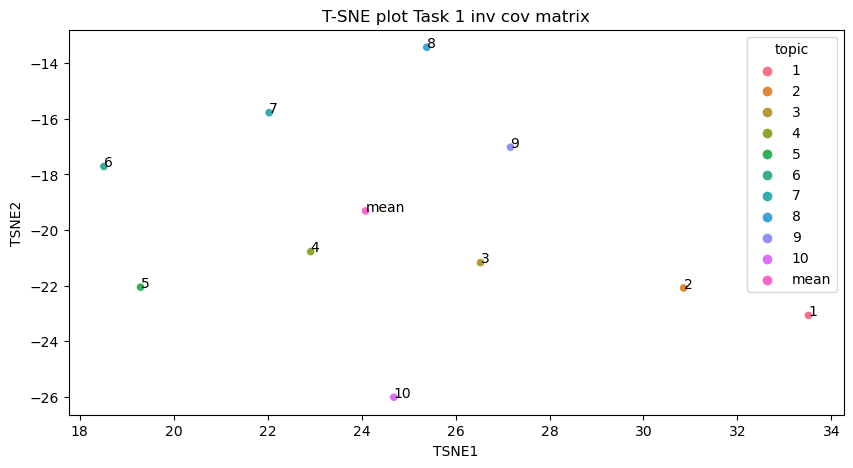

In [614]:
ma=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print('\nmodel ',data_set_num)
    #class_prototypes=pd.read_csv(f'task_2_models/norm_pca/class_prototypes_{data_set_num}.csv').set_index('label')
    inverse_cov_matrix=np.array(pd.read_csv(f'task_1_models/regularized/covariance_matrix_{data_set_num}_regularized.csv')) 
    ma.append(inverse_cov_matrix)
ma.append(np.mean(ma,axis=0))
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2,perplexity=2, learning_rate=10, random_state=0, angle=0.75)
tsne_features = tsne_model.fit_transform(np.array(ma).reshape(11,np.array(ma).shape[1]*np.array(ma).shape[2]))
df_tsne = pd.DataFrame(tsne_features)
df_tsne['topic'] = [1,2,3,4,5,6,7,8,9,10,'mean']
df_tsne.columns = ['TSNE1', 'TSNE2', 'topic']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('T-SNE plot Task 1 inv cov matrix')
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'topic', data = df_tsne, legend = 'full')
for i in range(len(ma)):
    plt.annotate(df_tsne['topic'].iloc[i],xy=(df_tsne['TSNE1'].iloc[i],df_tsne['TSNE2'].iloc[i])) 

# Task 2

In [752]:
task2_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv5_block1_out').output)
task2_model.trainable=False
#conv5_block1_out
#conv4_block6_out

In [753]:
with open(f'task_2_models/task_2_model.pkl','wb') as f:
    pickle.dump(task2_model,f)

In [618]:
from sklearn.metrics import pairwise
# just seeing how differece it makes, but not using it in final models/sumbissions as instructed
def get_mmd(features1,features2,g=1.0):
    xx=pairwise.rbf_kernel(features1, gamma=1.0 / (2 * g ** 2))
    yy=pairwise.rbf_kernel(features2, gamma=1.0 / (2 * g ** 2))
    xy=pairwise.rbf_kernel(features1, features2, gamma=1.0 / (2 * g ** 2))
    mmd_squared=np.mean(xx) + np.mean(yy) - 2 * np.mean(xy)
    return mmd_squared

In [ ]:
# pca with regularization and test combos
done_dataset_number=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print(data_set_num)
    d=torch.load(f'dataset/part_two_dataset/train_data/{data_set_num}_train_data.tar.pth')
    data=d['data']
    if data_set_num==1:
        # find labels from D10 of Task 1
        class_prototypes=pd.read_csv(f'task_1_models/pca/class_prototypes_{10}.csv').set_index('label')
        inverse_cov_matrix=np.array(pd.read_csv(f'task_1_models/pca/covariance_matrix_{10}.csv')) 
        with open(f'task_1_models/pca/pca_{10}.pkl','rb') as f:
            pca_model=pickle.load(f)   
        with open(f'task_1_models/task_1_model.pkl','rb') as f:
            task1_model=pickle.load(f)   
        processed_images=preprocess_input(data)
        extracted_features=task1_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)
        extracted_feature3=pca_model.transform(extracted_feature3)
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
            targets=min_distances
    else:
        targets=old_targets

    # find extracted_feature3 for this data
    # task2_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
    processed_images=preprocess_input(data)
    extracted_features=task2_model.predict(processed_images)
    extracted_feature3=GlobalMaxPooling2D()(extracted_features)
    
    # # trying pca
    # pca_model=PCA(n_components=1024)
    # extracted_feature3 = pca_model.fit_transform(extracted_feature3)
    # import pickle
    # with open(f'task_2_models/norm_pca/pca_{data_set_num}.pkl','wb') as f:
    #     pickle.dump(pca_model,f)

    train_data=pd.DataFrame(extracted_feature3).copy()
    train_data['label']=targets

    # compute new covariance matrix for each iteration?
    cov_model=LedoitWolf()
    cov_matrix=cov_model.fit(extracted_feature3).covariance_
    #cov_matrix=np.cov(extracted_feature3,rowvar=False)
    inverse_cov_matrix=np.linalg.inv(cov_matrix)

    # trying weighted avergaing cov matrix also (no improvement)
    if data_set_num!=1:
        inverse_cov_matrix=(0.8*inverse_cov_matrix)+(0.2*old_cov_inv)
    
    pd.DataFrame(inverse_cov_matrix).to_csv(f'task_2_models/norm_pca/covariance_matrix_{data_set_num}.csv',index=False)
    
    class_prototypes=train_data.groupby('label').mean() # this is the model
    
    print(class_prototypes.index) 
    
    # in case some label is missing in new data, we keep the missing label's mean vector same as original (as no data to update it with)
    if len(class_prototypes.index)!=10:
        missing_pro=prev_prototypes[~prev_prototypes.index.isin(class_prototypes.index)]
        missing_pro_updated=pd.concat([class_prototypes,missing_pro])
        class_prototypes=missing_pro_updated.sort_index()
        
    if data_set_num!=1:
        # prototype update from old and include covariance matrix
        class_prototypes.columns=class_prototypes.columns.astype(int)
        prev_prototypes.columns=prev_prototypes.columns.astype(int)
        mmd=get_mmd(extracted_feature3,np.array(extracted_feature3_old))
        print('MMD:',mmd)
        adj_proto=class_prototypes+ (np.exp(-mmd)*mmd*(prev_prototypes-class_prototypes))
        class_prototypes=(0.5*adj_proto)+(0.5*class_prototypes) 
        # for i in class_prototypes.index:
        #     class_prototypes.loc[i]=(np.dot(inverse_cov_matrix, class_prototypes.loc[i]) + np.dot(inverse_cov_matrix, prev_prototypes.loc[i])) / (2 * np.dot(inverse_cov_matrix, np.ones_like(prev_prototypes.loc[i])))



    
    lambda_l2=0.01
    class_prototypes=class_prototypes.apply(lambda x: x - lambda_l2 * x)
       
    print(class_prototypes.index)
    class_prototypes.to_csv(f'task_2_models/norm_pca/class_prototypes_{data_set_num}.csv')

# training accuracy check
    min_distances = []
    # i=0
    for vector in np.array(extracted_feature3):
        # i=i+1
        # print(i,end='\r')
        a=[]
        for i,class_prototype in class_prototypes.iterrows():
            #print(class_prototype)
            a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
        min_distance = np.argmin(a)
        min_distances.append(min_distance)
    print(f'training accuracy of dataset {data_set_num}',(pd.Series(min_distances)==pd.Series(targets)).sum()/len(targets))
    
    # make prediction for next dataset and use its prediction to generate new targets for next iteration 
    if data_set_num!=10:
        d=torch.load(f'dataset/part_two_dataset/train_data/{data_set_num+1}_train_data.tar.pth')
        data=d['data']
        # find extracted_feature3 for this data
        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        processed_images=preprocess_input(data)
        extracted_features=task2_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)
        extracted_feature3=pca_model.transform(extracted_feature3)

        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        old_targets=min_distances # send this prediction as labels for next iteration   
        prev_prototypes=class_prototypes.copy() # keeping copy of this iteration prototypes, to be used for updating next iteration if needed to replace any missing class label vector
        old_cov_inv=inverse_cov_matrix.copy()
        extracted_feature3_old=pd.DataFrame(extracted_feature3).copy()

In [724]:
%%time
# pca with regularization and test combos
done_dataset_number=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print(data_set_num)
    d=torch.load(f'dataset/part_two_dataset/train_data/{data_set_num}_train_data.tar.pth')
    data=d['data']
    if data_set_num==1:
        # find labels from D10 of Task 1
        class_prototypes=pd.read_csv(f'task_1_models/pca/class_prototypes_{10}.csv').set_index('label')
        inverse_cov_matrix=np.array(pd.read_csv(f'task_1_models/pca/covariance_matrix_{10}.csv')) 
        with open(f'task_1_models/pca/pca_{10}.pkl','rb') as f:
            pca_model=pickle.load(f)   
        with open(f'task_1_models/task_1_model.pkl','rb') as f:
            task1_model=pickle.load(f)   
        processed_images=preprocess_input(data)
        extracted_features=task1_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)
        extracted_feature3=pca_model.transform(extracted_feature3)
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
            targets=min_distances
    else:
        targets=old_targets

    # find extracted_feature3 for this data
    # task2_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
    processed_images=preprocess_input(data)
    extracted_features=task2_model.predict(processed_images)
    extracted_feature3=GlobalMaxPooling2D()(extracted_features)
    
    # task2_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv5_block1_out').output)
    # processed_images=preprocess_input(data)
    # extracted_features=task2_model.predict(processed_images)
    # extracted_feature4=GlobalAveragePooling2D()(extracted_features)

    # extracted_feature3=np.array(pd.concat([pd.DataFrame(extracted_feature3),pd.DataFrame(extracted_feature4)],axis=1))
    # # normalization
    # batch=tf.keras.layers.BatchNormalization()
    # extracted_feature3=batch(extracted_feature3,training=True)
    # with open(f'task_1_models/norm_pca/batch_{data_set_num}.pkl','wb') as f:
    #     pickle.dump(batch,f)    

    
    # # trying pca
    pca_model=PCA(n_components=512)
    extracted_feature3 = pca_model.fit_transform(extracted_feature3)
    import pickle
    with open(f'task_2_models/norm_pca/pca_{data_set_num}.pkl','wb') as f:
        pickle.dump(pca_model,f)

    train_data=pd.DataFrame(extracted_feature3).copy()
    train_data['label']=targets

    # compute new covariance matrix for each iteration?
    cov_model=LedoitWolf()
    cov_matrix=cov_model.fit(extracted_feature3).covariance_
    #cov_matrix=np.cov(extracted_feature3,rowvar=False)
    inverse_cov_matrix=np.linalg.inv(cov_matrix)

    # # trying weighted avergaing cov matrix also (no improvement)
    # if data_set_num!=1:
    #     inverse_cov_matrix=(0.8*inverse_cov_matrix)+(0.2*old_cov_inv)
    
    pd.DataFrame(inverse_cov_matrix).to_csv(f'task_2_models/norm_pca/covariance_matrix_{data_set_num}.csv',index=False)
    
    class_prototypes=train_data.groupby('label').mean() # this is the model
    
    print(class_prototypes.index) 
    
    # in case some label is missing in new data, we keep the missing label's mean vector same as original (as no data to update it with)
    if len(class_prototypes.index)!=10:
        missing_pro=prev_prototypes[~prev_prototypes.index.isin(class_prototypes.index)]
        missing_pro_updated=pd.concat([class_prototypes,missing_pro])
        class_prototypes=missing_pro_updated.sort_index()
        
    if data_set_num!=1:
        # prototype update from old and include covariance matrix
        class_prototypes.columns=class_prototypes.columns.astype(int)
        prev_prototypes.columns=prev_prototypes.columns.astype(int)
        mmd=get_mmd(extracted_feature3,np.array(extracted_feature3_old))
        print('MMD:',mmd)
        adj_proto=class_prototypes+ (np.exp(-mmd)*(prev_prototypes-class_prototypes))
        class_prototypes=(0.5*adj_proto)+(0.5*class_prototypes) 
        # for i in class_prototypes.index:
        #     class_prototypes.loc[i]=(np.dot(inverse_cov_matrix, class_prototypes.loc[i]) + np.dot(inverse_cov_matrix, prev_prototypes.loc[i])) / (2 * np.dot(inverse_cov_matrix, np.ones_like(prev_prototypes.loc[i])))



    
    lambda_l2=0.01
    class_prototypes=class_prototypes.apply(lambda x: x - lambda_l2 * x)
       
    print(class_prototypes.index)
    class_prototypes.to_csv(f'task_2_models/norm_pca/class_prototypes_{data_set_num}.csv')


# training accuracy check
    min_distances = []
    # i=0
    for vector in np.array(extracted_feature3):
        # i=i+1
        # print(i,end='\r')
        a=[]
        for i,class_prototype in class_prototypes.iterrows():
            #print(class_prototype)
            a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
        min_distance = np.argmin(a)
        min_distances.append(min_distance)
    print(f'training accuracy of dataset {data_set_num}',(pd.Series(min_distances)==pd.Series(targets)).sum()/len(targets))
    
    
    # make prediction for next dataset and use its prediction to generate new targets for next iteration 
    if data_set_num!=10:
        d=torch.load(f'dataset/part_two_dataset/train_data/{data_set_num+1}_train_data.tar.pth')
        data=d['data']
        # find extracted_feature3 for this data
        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        processed_images=preprocess_input(data)
        extracted_features=task2_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)


        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv5_block1_out').output)
        # processed_images=preprocess_input(data)
        # extracted_features=task1_model.predict(processed_images)
        # extracted_feature4=GlobalAveragePooling2D()(extracted_features)
    
        # extracted_feature3=np.array(pd.concat([pd.DataFrame(extracted_feature3),pd.DataFrame(extracted_feature4)],axis=1))

        # extracted_feature3=batch(extracted_feature3,training=False)
        
        extracted_feature3=pca_model.transform(extracted_feature3)

        
        
        # use previous matrix only
        # cov_matrix=np.cov(extracted_feature3,rowvar=False)
        # inverse_cov_matrix=np.linalg.inv(cov_matrix)
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        old_targets=min_distances # send this prediction as labels for next iteration   
        prev_prototypes=class_prototypes.copy() # keeping copy of this iteration prototypes, to be used for updating next iteration if needed to replace any missing class label vector
        old_cov_inv=inverse_cov_matrix.copy()
        extracted_feature3_old=pd.DataFrame(extracted_feature3).copy()

# finding accuracies matrix on heldout datasets
accuracy_matrix_final=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print('\nmodel ',data_set_num)
    class_prototypes=pd.read_csv(f'task_2_models/norm_pca/class_prototypes_{data_set_num}.csv').set_index('label')

    inverse_cov_matrix=np.array(pd.read_csv(f'task_2_models/norm_pca/covariance_matrix_{data_set_num}.csv')) 
    accuracy_matrix={1:None,2:None,3:None,4:None,5:None,6:None,7:None,8:None,9:None,10:None}
    with open(f'task_2_models/norm_pca/pca_{data_set_num}.pkl','rb') as f:
        pca_model=pickle.load(f)
    # with open(f'task_1_models/norm_pca/batch_{data_set_num}.pkl','rb') as f:
    #     batch=pickle.load(f)
    # for all datasets lower than or equal to data_set_num
    for x in range(1,data_set_num+1,1):
        print('dataset',x)
        # read the dataset and extract its features and test accuracy
        d2=torch.load(f'dataset/part_two_dataset/eval_data/{x}_eval_data.tar.pth')
        data=d2['data']
        actual_targets=d2['targets']

        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        processed_images=preprocess_input(data)
        extracted_features=task1_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)
        
        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv5_block1_out').output)
        # processed_images=preprocess_input(data)
        # extracted_features=task1_model.predict(processed_images)
        # extracted_feature4=GlobalAveragePooling2D()(extracted_features)
    
        # extracted_feature3=np.array(pd.concat([pd.DataFrame(extracted_feature3),pd.DataFrame(extracted_feature4)],axis=1))
        # extracted_feature3=batch(extracted_feature3,training=False)
        
        extracted_feature3=pca_model.transform(extracted_feature3)

        # # get current data inv cov matrix
        # cov_matrix=np.cov(extracted_feature3,rowvar=False)
        # inverse_cov_matrix=np.linalg.inv(cov_matrix)
        
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        acc=(min_distances==actual_targets).sum()/len(actual_targets) 
        print('accuracy',acc)
        accuracy_matrix[x]=acc
    accuracy_matrix_final.append(accuracy_matrix)
accuracy_matrix_final2=pd.DataFrame(accuracy_matrix_final).fillna('')
accuracy_matrix_final2.index=['model 1','model 2','model 3','model 4','model 5','model 6','model 7','model 8','model 9','model 10']
accuracy_matrix_final2.columns='dataset '+ pd.Series(accuracy_matrix_final2.columns).astype(str)
accuracy_matrix_final2 # not significant drop in previous datasets by ith model, but overall accuracy is not good

1
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 1 0.7128
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
2
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
MMD: 0.031038559644676278
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 2 0.7304
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
3
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
MMD: 0.013218810034336448
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
training accuracy of dataset 3 0.7864
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
4
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='label')
MMD: 0.0697407071095697
Index([0, 1, 

,dataset 1,dataset 2,dataset 3,dataset 4,dataset 5,dataset 6,dataset 7,dataset 8,dataset 9,dataset 10
model 1,0.1164,,,,,,,,,
model 2,0.1100,0.11,,,,,,,,
model 3,0.1164,0.1116,0.1092,,,,,,,
model 4,0.0808,0.09,0.0732,0.08,,,,,,
model 5,0.0844,0.0908,0.0852,0.0952,0.0868,,,,,
model 6,0.1168,0.1024,0.1108,0.1028,0.1056,0.1108,,,,
model 7,0.1020,0.0944,0.1004,0.1008,0.1024,0.1012,0.0968,,,
model 8,0.1108,0.1112,0.1136,0.0976,0.1096,0.1128,0.0988,0.1108,,
model 9,0.1076,0.0884,0.1024,0.0996,0.1008,0.1,0.0992,0.0972,0.102,
model 10,0.1096,0.094,0.1092,0.1012,0.104,0.1048,0.1024,0.1116,0.098,0.1016


79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


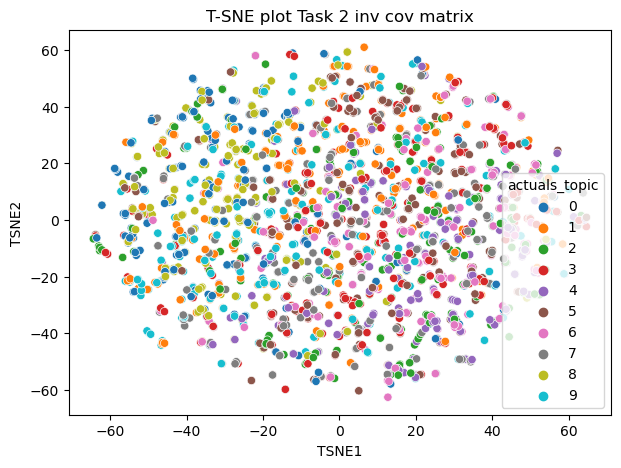

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


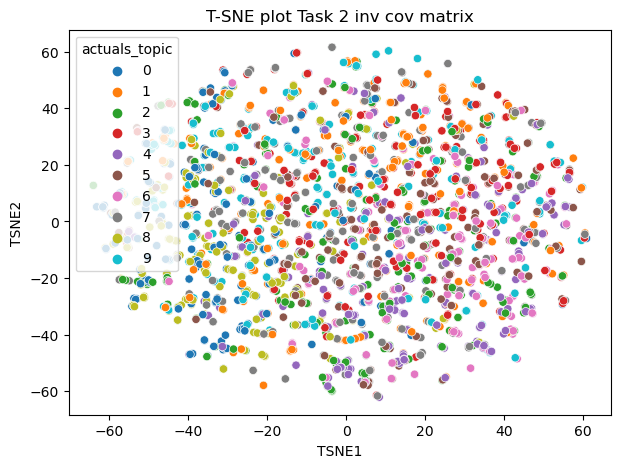

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


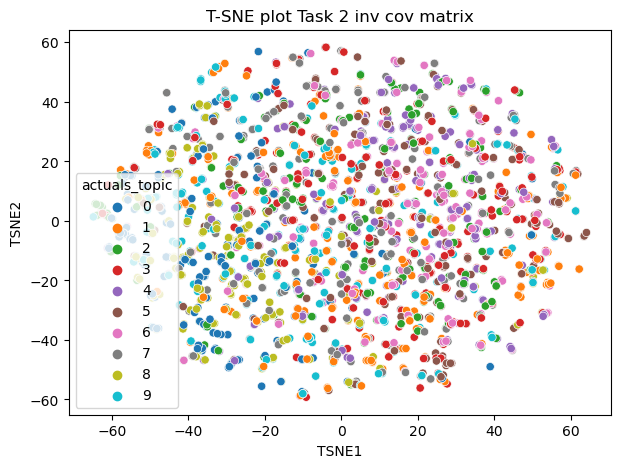

12/79 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step

KeyboardInterrupt: 

In [650]:
# class_prototypes
# tsne_model = TSNE(n_components=2,perplexity=2, learning_rate=10, random_state=0, angle=0.75)
# tsne_features = tsne_model.fit_transform(class_prototypes)
# df_tsne = pd.DataFrame(tsne_features)
# df_tsne['topic'] = [1,2,3,4,5,6,7,8,9,10]
# df_tsne.columns = ['TSNE1', 'TSNE2', 'topic']
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(7, 5))
# plt.title('T-SNE plot Task 2 inv cov matrix')
# ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'topic', data = df_tsne, legend = 'full',palette=sns.color_palette("tab10", 10))

for dataset in [1,2,3,4,5,6,7,8,9,10]:
    d2=torch.load(f'dataset/part_two_dataset/eval_data/{dataset}_eval_data.tar.pth')
    data=d2['data']
    actual_targets=d2['targets']    
    processed_images=preprocess_input(data)
    extracted_features=task2_model.predict(processed_images)
    extracted_feature3=GlobalAveragePooling2D()(extracted_features)
    tsne_model = TSNE(n_components=2,perplexity=2, learning_rate=10, random_state=0, angle=0.75)
    tsne_features = tsne_model.fit_transform(extracted_feature3)
    df_tsne = pd.DataFrame(tsne_features)
    df_tsne['actuals_topic'] = actual_targets
    df_tsne.columns = ['TSNE1', 'TSNE2','actuals_topic']
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(7, 5))
    plt.title('T-SNE plot Task 2 inv cov matrix')
    ax=sns.scatterplot(x = 'TSNE1', y = 'TSNE2',hue='actuals_topic', data = df_tsne,palette=sns.color_palette("tab10", 10))
    plt.show()


model  1

model  2

model  3

model  4

model  5

model  6

model  7

model  8

model  9

model  10


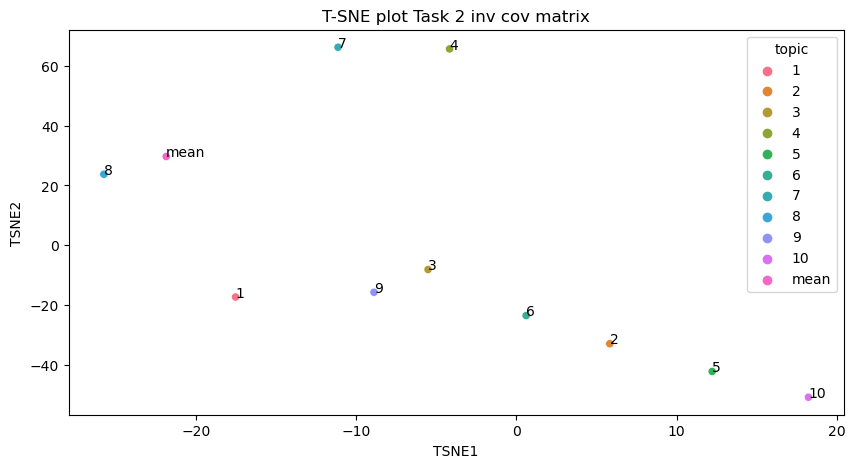

In [657]:
ma=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print('\nmodel ',data_set_num)
    #class_prototypes=pd.read_csv(f'task_2_models/norm_pca/class_prototypes_{data_set_num}.csv').set_index('label')
    inverse_cov_matrix=np.array(pd.read_csv(f'task_2_models/norm_pca/covariance_matrix_{data_set_num}.csv')) 
    ma.append(inverse_cov_matrix)
ma.append(np.mean(ma,axis=0))
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2,perplexity=2, learning_rate=10, random_state=0, angle=0.75)
tsne_features = tsne_model.fit_transform(np.array(ma).reshape(11,np.array(ma).shape[1]*np.array(ma).shape[2]))
df_tsne = pd.DataFrame(tsne_features)
df_tsne['topic'] = [1,2,3,4,5,6,7,8,9,10,'mean']
df_tsne.columns = ['TSNE1', 'TSNE2', 'topic']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('T-SNE plot Task 2 inv cov matrix')
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'topic', data = df_tsne, legend = 'full')
for i in range(len(ma)):
    plt.annotate(df_tsne['topic'].iloc[i],xy=(df_tsne['TSNE1'].iloc[i],df_tsne['TSNE2'].iloc[i]))

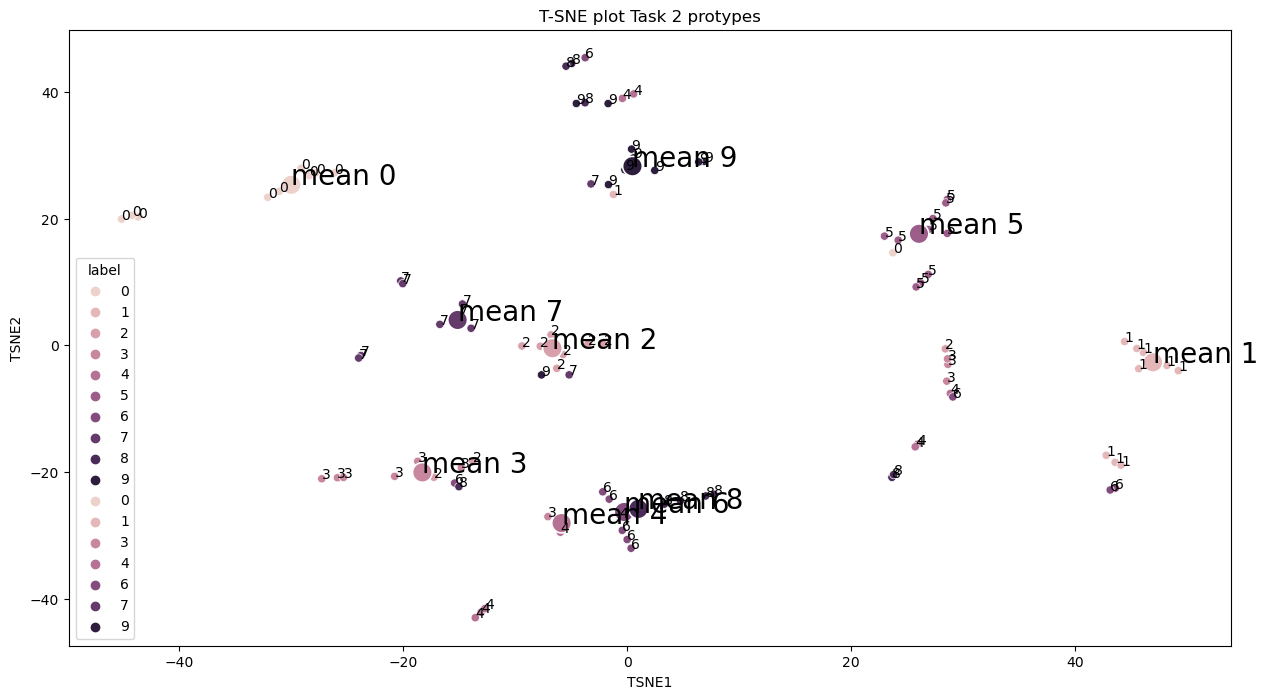

In [658]:
ma=pd.DataFrame()
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    #print('\nmodel ',data_set_num)
    #class_prototypes=pd.read_csv(f'task_2_models/norm_pca/class_prototypes_{data_set_num}.csv').set_index('label')
    inverse_cov_matrix=pd.read_csv(f'task_2_models/norm_pca/class_prototypes_{data_set_num}.csv')
    inverse_cov_matrix['df']=data_set_num
    ma=pd.concat([inverse_cov_matrix,ma])
#ma.append(np.mean(ma,axis=1))
ma=ma.reset_index(drop=True)

maa=ma.copy()
del maa['df']
df_mean=ma.groupby(['label']).mean().reset_index()
df_mean['df']='mean'

ma2=pd.concat([ma,df_mean]).reset_index(drop=True)

from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2,perplexity=2, learning_rate=10, random_state=0, angle=0.75)
tsne_features = tsne_model.fit_transform(ma2[ma2.columns.difference(['df','label'])])
df_tsne = pd.DataFrame(tsne_features)
df_tsne['label'] = ma2['label']
df_tsne['df'] = ma2['df']

df_tsne.columns = ['TSNE1', 'TSNE2', 'label','df']

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))

no_mean=df_tsne[df_tsne.df!='mean']
mena_df=df_tsne[df_tsne.df=='mean']
plt.title('T-SNE plot Task 2 protypes')
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'label', data = no_mean, legend = 'full')
for i in range(len(no_mean)):
    plt.annotate(no_mean['label'].iloc[i],xy=(no_mean['TSNE1'].iloc[i],no_mean['TSNE2'].iloc[i]))
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'label', data = mena_df,ax=ax,marker='o',s=200)
for i in range(len(mena_df)):
    plt.annotate('mean '+str(mena_df['label'].iloc[i]),xy=(mena_df['TSNE1'].iloc[i],mena_df['TSNE2'].iloc[i]),fontsize=20) # looks decent

In [ ]:
%%time
# pca with regularization and test combos
done_dataset_number=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print(data_set_num)
    d=torch.load(f'dataset/part_two_dataset/train_data/{data_set_num}_train_data.tar.pth')
    data=d['data']
    if data_set_num==1:
        # find labels from D10 of Task 1
        class_prototypes=pd.read_csv(f'task_1_models/pca/class_prototypes_{10}.csv').set_index('label')
        inverse_cov_matrix=np.array(pd.read_csv(f'task_1_models/pca/covariance_matrix_{10}.csv')) 
        with open(f'task_1_models/pca/pca_{10}.pkl','rb') as f:
            pca_model=pickle.load(f)   
        with open(f'task_1_models/task_1_model.pkl','rb') as f:
            task1_model=pickle.load(f)   
        processed_images=preprocess_input(data)
        extracted_features=task1_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)
        extracted_feature3=pca_model.transform(extracted_feature3)
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
            targets=min_distances
    else:
        targets=old_targets

    # find extracted_feature3 for this data
    # task2_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
    processed_images=preprocess_input(data)
    extracted_features=task2_model.predict(processed_images)
    extracted_feature3=GlobalMaxPooling2D()(extracted_features)
    
    # task2_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv5_block1_out').output)
    # processed_images=preprocess_input(data)
    # extracted_features=task2_model.predict(processed_images)
    # extracted_feature4=GlobalAveragePooling2D()(extracted_features)

    # extracted_feature3=np.array(pd.concat([pd.DataFrame(extracted_feature3),pd.DataFrame(extracted_feature4)],axis=1))
    # # normalization
    # batch=tf.keras.layers.BatchNormalization()
    # extracted_feature3=batch(extracted_feature3,training=True)
    # with open(f'task_1_models/norm_pca/batch_{data_set_num}.pkl','wb') as f:
    #     pickle.dump(batch,f)    

    
    # # trying pca
    pca_model=PCA(n_components=512)
    extracted_feature3 = pca_model.fit_transform(extracted_feature3)
    import pickle
    with open(f'task_2_models/norm_pca/pca_{data_set_num}.pkl','wb') as f:
        pickle.dump(pca_model,f)

    train_data=pd.DataFrame(extracted_feature3).copy()
    train_data['label']=targets

    # compute new covariance matrix for each iteration?
    cov_model=LedoitWolf()
    cov_matrix=cov_model.fit(extracted_feature3).covariance_
    #cov_matrix=np.cov(extracted_feature3,rowvar=False)
    inverse_cov_matrix=np.linalg.inv(cov_matrix)

    # # trying weighted avergaing cov matrix also (no improvement)
    # if data_set_num!=1:
    #     inverse_cov_matrix=(0.8*inverse_cov_matrix)+(0.2*old_cov_inv)
    
    pd.DataFrame(inverse_cov_matrix).to_csv(f'task_2_models/norm_pca/covariance_matrix_{data_set_num}.csv',index=False)
    
    class_prototypes=train_data.groupby('label').mean() # this is the model
    
    print(class_prototypes.index) 
    
    # in case some label is missing in new data, we keep the missing label's mean vector same as original (as no data to update it with)
    if len(class_prototypes.index)!=10:
        missing_pro=prev_prototypes[~prev_prototypes.index.isin(class_prototypes.index)]
        missing_pro_updated=pd.concat([class_prototypes,missing_pro])
        class_prototypes=missing_pro_updated.sort_index()
        
    if data_set_num!=1:
        # prototype update from old and include covariance matrix
        class_prototypes.columns=class_prototypes.columns.astype(int)
        prev_prototypes.columns=prev_prototypes.columns.astype(int)
        mmd=get_mmd(extracted_feature3,np.array(extracted_feature3_old))
        print('MMD:',mmd)
        adj_proto=class_prototypes+ (np.exp(-mmd)*(prev_prototypes-class_prototypes))
        class_prototypes=(0.5*adj_proto)+(0.5*class_prototypes) 
        # for i in class_prototypes.index:
        #     class_prototypes.loc[i]=(np.dot(inverse_cov_matrix, class_prototypes.loc[i]) + np.dot(inverse_cov_matrix, prev_prototypes.loc[i])) / (2 * np.dot(inverse_cov_matrix, np.ones_like(prev_prototypes.loc[i])))



    
    lambda_l2=0.01
    class_prototypes=class_prototypes.apply(lambda x: x - lambda_l2 * x)
       
    print(class_prototypes.index)
    class_prototypes.to_csv(f'task_2_models/norm_pca/class_prototypes_{data_set_num}.csv')


# training accuracy check
    min_distances = []
    # i=0
    for vector in np.array(extracted_feature3):
        # i=i+1
        # print(i,end='\r')
        a=[]
        for i,class_prototype in class_prototypes.iterrows():
            #print(class_prototype)
            a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
        min_distance = np.argmin(a)
        min_distances.append(min_distance)
    print(f'training accuracy of dataset {data_set_num}',(pd.Series(min_distances)==pd.Series(targets)).sum()/len(targets))
    
    
    # make prediction for next dataset and use its prediction to generate new targets for next iteration 
    if data_set_num!=10:
        d=torch.load(f'dataset/part_two_dataset/train_data/{data_set_num+1}_train_data.tar.pth')
        data=d['data']
        # find extracted_feature3 for this data
        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        processed_images=preprocess_input(data)
        extracted_features=task2_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)


        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv5_block1_out').output)
        # processed_images=preprocess_input(data)
        # extracted_features=task1_model.predict(processed_images)
        # extracted_feature4=GlobalAveragePooling2D()(extracted_features)
    
        # extracted_feature3=np.array(pd.concat([pd.DataFrame(extracted_feature3),pd.DataFrame(extracted_feature4)],axis=1))

        # extracted_feature3=batch(extracted_feature3,training=False)
        
        extracted_feature3=pca_model.transform(extracted_feature3)

        
        
        # use previous matrix only
        # cov_matrix=np.cov(extracted_feature3,rowvar=False)
        # inverse_cov_matrix=np.linalg.inv(cov_matrix)
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        old_targets=min_distances # send this prediction as labels for next iteration   
        prev_prototypes=class_prototypes.copy() # keeping copy of this iteration prototypes, to be used for updating next iteration if needed to replace any missing class label vector
        old_cov_inv=inverse_cov_matrix.copy()
        extracted_feature3_old=pd.DataFrame(extracted_feature3).copy()

# finding accuracies matrix on heldout datasets
accuracy_matrix_final=[]
for data_set_num in [1,2,3,4,5,6,7,8,9,10]:
    print('\nmodel ',data_set_num)
    class_prototypes=pd.read_csv(f'task_2_models/norm_pca/class_prototypes_{data_set_num}.csv').set_index('label')

    inverse_cov_matrix=np.array(pd.read_csv(f'task_2_models/norm_pca/covariance_matrix_{data_set_num}.csv')) 
    accuracy_matrix={1:None,2:None,3:None,4:None,5:None,6:None,7:None,8:None,9:None,10:None}
    with open(f'task_2_models/norm_pca/pca_{data_set_num}.pkl','rb') as f:
        pca_model=pickle.load(f)
    # with open(f'task_1_models/norm_pca/batch_{data_set_num}.pkl','rb') as f:
    #     batch=pickle.load(f)
    # for all datasets lower than or equal to data_set_num
    for x in range(1,data_set_num+1,1):
        print('dataset',x)
        # read the dataset and extract its features and test accuracy
        d2=torch.load(f'dataset/part_two_dataset/eval_data/{x}_eval_data.tar.pth')
        data=d2['data']
        actual_targets=d2['targets']

        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv4_block6_out').output)
        processed_images=preprocess_input(data)
        extracted_features=task1_model.predict(processed_images)
        extracted_feature3=GlobalMaxPooling2D()(extracted_features)
        
        # task1_model=Model(inputs=resnet_model.input,outputs=resnet_model.get_layer('conv5_block1_out').output)
        # processed_images=preprocess_input(data)
        # extracted_features=task1_model.predict(processed_images)
        # extracted_feature4=GlobalAveragePooling2D()(extracted_features)
    
        # extracted_feature3=np.array(pd.concat([pd.DataFrame(extracted_feature3),pd.DataFrame(extracted_feature4)],axis=1))
        # extracted_feature3=batch(extracted_feature3,training=False)
        
        extracted_feature3=pca_model.transform(extracted_feature3)

        # # get current data inv cov matrix
        # cov_matrix=np.cov(extracted_feature3,rowvar=False)
        # inverse_cov_matrix=np.linalg.inv(cov_matrix)
        
        min_distances = []
        # i=0
        for vector in np.array(extracted_feature3):
            # i=i+1
            # print(i,end='\r')
            a=[]
            for i,class_prototype in class_prototypes.iterrows():
                #print(class_prototype)
                a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
            min_distance = np.argmin(a)
            min_distances.append(min_distance)
        acc=(min_distances==actual_targets).sum()/len(actual_targets) 
        print('accuracy',acc)
        accuracy_matrix[x]=acc
    accuracy_matrix_final.append(accuracy_matrix)
accuracy_matrix_final2=pd.DataFrame(accuracy_matrix_final).fillna('')
accuracy_matrix_final2.index=['model 1','model 2','model 3','model 4','model 5','model 6','model 7','model 8','model 9','model 10']
accuracy_matrix_final2.columns='dataset '+ pd.Series(accuracy_matrix_final2.columns).astype(str)
accuracy_matrix_final2 # not significant drop in previous datasets by ith model, but overall accuracy is not good

# Testing UMAP

In [783]:
from sklearn.decomposition import KernelPCA, PCA
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP
d=torch.load(f'dataset/part_one_dataset/train_data/{1}_train_data.tar.pth')
targets=d['targets']
extracted_feature3=pd.read_parquet(f'task_1_models/new_extractor_ui/store_features/train_dataset_{1}.parquet')
from sklearn.decomposition import PCA

umap_model_1=UMAP(n_components=500,n_neighbors=20,metric='manhattan',min_dist=0.3)
umap_features=umap_model_1.fit_transform(extracted_feature3)

# umap_model=KernelPCA(n_components=10,kernel='poly')
# umap_features=umap_model.fit_transform(umap_features1)

umap_features=pd.DataFrame(umap_features)
sns.scatterplot(x=umap_features.iloc[:,0],y=umap_features.iloc[:,1],hue=targets,palette=sns.color_palette("tab10", 10))
plt.show()


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


KeyboardInterrupt: 

In [ ]:
extracted_feature3=umap_features
train_data=pd.DataFrame(extracted_feature3).copy()
train_data['label']=targets
class_prototypes=train_data.groupby('label').mean() # this is the model
print(class_prototypes.index)
final_cov_matrix=pd.DataFrame()
for classs in [0,1,2,3,4,5,6,7,8,9]:
    # compute new covariance matrix for each iteration: additing shrinkage
    extracted_feature3_copy=pd.DataFrame(extracted_feature3).copy()
    extracted_feature3_copy['label']=targets
    extracted_feature3_copy=extracted_feature3_copy[extracted_feature3_copy['label']==classs]
    if len(extracted_feature3_copy)==0: #ensure dataset 1 has all classes, else old_cov_inv should throw an error
        inverse_cov_matrix=old_cov_inv[old_cov_inv['class']==classs]
        final_cov_matrix=pd.concat([inverse_cov_matrix,final_cov_matrix]).reset_index(drop=True)
        continue
        
    del extracted_feature3_copy['label']
    cov_model=LedoitWolf()
    epsilon=1e-5
    cov_matrix=cov_model.fit(np.array(extracted_feature3_copy)).covariance_ 
    cov_matrix=cov_matrix+(np.eye(cov_matrix.shape[0]) * epsilon)
    #cov_matrix=np.cov(extracted_feature3,rowvar=False)
    
    inverse_cov_matrix=np.linalg.inv(cov_matrix)
    inverse_cov_matrix=pd.DataFrame(inverse_cov_matrix)
    inverse_cov_matrix['class']=classs
    final_cov_matrix=pd.concat([inverse_cov_matrix,final_cov_matrix]).reset_index(drop=True)
epsilon=1e-5
cov_matrix=np.cov(extracted_feature3,rowvar=False)
cov_matrix=cov_matrix+(np.eye(cov_matrix.shape[0]) * epsilon)
inverse_cov_matrix=np.linalg.inv(cov_matrix)
min_distances = []
# i=0
for vector in np.array(extracted_feature3):
    # i=i+1
    # print(i,end='\r')
    a=[]
    for i,class_prototype in class_prototypes.iterrows():
        temp_cov=final_cov_matrix[final_cov_matrix['class']==i]
        del temp_cov['class']
        a.append(mahalanobis(vector, class_prototype, np.array(temp_cov)))
        #a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
    min_distance = np.argmin(a)
    min_distances.append(min_distance)
print(f'training accuracy of dataset {1}',(pd.Series(min_distances)==pd.Series(targets)).sum()/len(targets))
ax=sns.scatterplot(x=extracted_feature3.iloc[:,0],y=extracted_feature3.iloc[:,1],hue=targets,palette=sns.color_palette("tab10", 10))
plt.show()
ax=sns.scatterplot(x=extracted_feature3.iloc[:,0],y=extracted_feature3.iloc[:,1],hue=min_distances,palette=sns.color_palette("tab10", 10))
plt.show()


In [ ]:
d=torch.load(f'dataset/part_one_dataset/eval_data/{10}_eval_data.tar.pth')
targets=d['targets']
extracted_feature3=pd.read_parquet(f'task_1_models/new_extractor_ui/store_features/eval_dataset_{10}.parquet')
umap_features=umap_model_1.transform(extracted_feature3)
#umap_features=umap_model.transform(umap_features1)

In [ ]:
extracted_feature3=umap_features
train_data=pd.DataFrame(extracted_feature3).copy()
train_data['label']=targets
#display(train_data.head())
min_distances = []
# i=0
for vector in np.array(extracted_feature3):
    # i=i+1
    # print(i,end='\r')
    a=[]
    for i,class_prototype in class_prototypes.iterrows():
        temp_cov=final_cov_matrix[final_cov_matrix['class']==i]
        del temp_cov['class']
        a.append(mahalanobis(vector, class_prototype, np.array(temp_cov)))
        #a.append(mahalanobis(vector, class_prototype, inverse_cov_matrix))
    min_distance = np.argmin(a)
    min_distances.append(min_distance)
print(f'eval accuracy of dataset {1}',(pd.Series(min_distances)==pd.Series(targets)).sum()/len(targets))
ax=sns.scatterplot(x=extracted_feature3[:,0],y=extracted_feature3[:,1],hue=targets,palette=sns.color_palette("tab10", 10))
plt.show()
ax=sns.scatterplot(x=extracted_feature3[:,0],y=extracted_feature3[:,1],hue=min_distances,palette=sns.color_palette("tab10", 10))
plt.show()

